# Обучение с подкреплением (reinforcement learning)

- Поясняет, как принимать наилучшие решения последовательно
- Занимается задачами посл. принятия решений
- Часть ML, в которой изучается посл. принятие решений
- Подход в автоматизации посредством обучения тому, какие действия следует принимать окр. среде
- Обучение тому, что делать 👍
- Объединяет задачи:
    - исследование новых ситуаций
    - использование этого опыта для принятия более кач. решений

__Задачи последовательного принятия решений__
- компьютерные игры
- вождение автомобиля

__Цели__
- победить в игре
- безопасно доехать до пункта назначения

Достижение цели подр. выполнение ряда действий, каждое из которых изменяет окр. мир. Наблюдаем за изменениями мира, получаем обратную информацию, опираясь на которую принимаем решение о след. шаге

Парадигма RL развивалась как 2 незав. дисциплины:
1. Поведенческая психология. Термин "подкрепление" впервые появился в переводах из рукописей Павлова об условных рефлексах.
2. Теория для описания оптимального управления системами. Термин возник в 1950-х с целью описания, как настроить систему для достижения поставленной цели. В 11957 г. Ричард Беллман разработал марковский процесс принятия решений - набор требований к математически упр. среде и динамическому программированию.

Задачи RL могут быть представлены как система, сост. из __агента__ и __среды__.  
Среда предст. информацию, описывающую состояние системы.  
Агент взаимодействует со средой, наблюдая состояние и используя данную информацию при выборе действия.  
Среда принимает действие и переходит в след. состояние, а хатем возвращает агенту след. состояние и вознаграждение.

## Формальные обозначения

Состояние:

$s_t\in S$, где $S$ - пространство состояний

Действие:

$a_t\in A$, где $A$ - пространство действий

Вознаграждение:

$r_t=R(s_t, a_t, s_{t+1})$, где $R$ - функция вознаграждения

# Обучение с подкреплением как МППР

## Марковская цепь

Марковской цепью наз. пара $(s, p)$, где  
s - мн-во состояний  
p - вероятности переходов $\{p(s_{t+1}|s_t)|t\in \{0, 1, ...\}, s_t, s_{t+1}\in S\}$

Если дополнительно задать старт. знач. $s_0$, то получаем процесс, зад. марковской цепью.

Марковская

![](./1695886488147.jpg)

3 -> * -> 2

In [2]:
0.1 * 0.5 + 0.1 * 0.2 + 0.6 * 0.5

0.37

3 -> * -> 3

In [3]:
0.1 * 0.5 + 0.1 * 0.1

0.060000000000000005

3 -> * -> 4

In [4]:
0.2 * 0.75 + 0.1 * 0.6 + 0.6 * 0.5

0.51

In [5]:
import torch

In [ ]:
P: torch.Tensor = torch.tensor([
    [0, 0.5, 0.5, 0],
    [0.25, 0, 0, 0.75],
    [0.1, 0.2, 0.1, 0.6],
    [0, 0.5, 0, 0.5]
])

p0 = torch.tensor([0, 1, 0, 0])
p2 = torch.matrix_power(P, 2)
print(p2)

In [ ]:
for i in (2, 3, 4, 5, 10, 15, 20, 40, 80):
    power = torch.matrix_power(P, i)
    print(i, power, end="\n\n", sep="\n")

## Среда

Для моделирования влияния агента на среду в вероятности переходов достаточно добавить зависимость от выбираемых агентом действий. Модель среды - управляемая марковская цепь.

Среда: $(S, A, P)$, где  
S - пространство состояний,  
A - пространство действий,  
P - функция переходов или динамика среды: вероятности $p(s'|s, a)$

Среда, находясь в состоянии a, ожидает от агента действие $a'\in A$, после совершает шаг, сэмплируя следующее состояние $s'\sim p(s'|s, a)$.

Предполагаем, что среда полностью наблюдаема: агенту при выборе $a_t$ доступно всё состояние $s_t$.

Понятие состояния применялось в случаях: ...


In [8]:
P = torch.tensor([
    [[0, 0, 1, 0], [0, 1, 0, 0]],
    [[1, 0, 0, 0], [0, 0, 0, 1]],
    [[0, 0, 0.3, 0.7], [0.2, 0.8, 0, 0]],
    [[0, 0, 0.4, 0.6], [0, 0.5, 0, 0.5]],
])

## Действия

Выделяют два вида пространства действий A:
1. конечное или дискретное пространство действий $|A|<+\infty$. Будем предполагать, что число действий достаточно мало;
2. непр. пр-во действий $A\subseteq [-1, 1]^m.$ Задачи с таким пр-вом действий наз. задачами непрерывного управления.

В общем случае процесс выбора действия агентом может быть стохастичен. Таким образом, объектом поиска будет распределение $\pi(a|s), a\in A, s\in S$

Агент задает процедуру выбора действия по доступным наблюдениям. Эта процедура - стратегия или политика.

## Траектория

Набор $\tau:=(s_0, a_0, s_1, a_1, ...)$ наз. __траекторией__.

Траектория - СВ, которые заданы конкретным процессом порождения:
- действия генерируются из нек. стратегии,
- состояния - из функции переходов.

Для данной среды, политики $\pi$ и нач. сост. $s_0\in S$ ...

![](./1695890063531.jpg)

# Марковский процесс принятия решений (MDP, МППР)

MDP наз. конечным или табличным, если пространства состояний и действий конечны: $|s|<\infty, |A|<\infty$

![](./1696232118622.jpg)

## Эпизодичность

Состояние $s$ наз. терминальным, если $\forall a\in A$:  
$P(s'=s|s,a)=1$ $r(s|a)=0$,  
т.е. с вероятностью 1 агент не может покинуть состояние.

Считается, что на каждом шаге взаимодействия агент дополнительно получает для очередного состояния s значение $done(s)\in(\{0, 1\})$, является ли данное состояние терминальным.

Один цикл процесса от старт. состояния до терминального наз. __эпизодом__.  
Среда наз. эпизодичной, если для любой стратегии процесс взаимодействия гарантированно завершается не более чем за некоторое конечное $T^{max}$ число шагов.

Граф эпизодических сред - дерево: в эпиз. средах вероятность оказаться в одном состоянии дважды = 0.

![](./1696233396242.jpg)

## Дисконтирование

Задача заклю в том, чтобы найти стратегию $\pi$, макс. среднюю суммарную награду. Формально, задан функционал для оптимизации:
$$E_{r\sim\pi}\sum_{t\geq0}{r_t}\Rightarrow\underset{\pi}{\max},$$
где $r_t:=r(s_t,a_t)$ - награда на шаге t.

- Вводится ограничение на модуль награды за шаг, т.е. среда не может награждать агента бесконечно сильно:
$$\forall s,a:|r(s,a)|\leq r^{max}$$
- Вводится дисконтирование, коэфф. кот. обозначают $\gamma$.

__Дисконтированной кумулятивной наградой__ для траектории $\tau$ с коэфф. $\gamma\in(0, 1]$ наз.
$$R(\tau):=\sum_{t\geq 0}{\gamma^t r_t}$$

Score стратегии $\pi$ в MDP наз.:
$$J(\pi):=E_{\tau\sim\pi}R(\tau)$$
где $E$ - мат. ожидание

__Задачей обучения с подкреплением__ явл. оптимизация для заданного MDP средней дисконт. кум. награды:
$$J(\pi)\rightarrow \underset{\pi}{\max}$$

Посчитать score для $\gamma=\frac{15}{19}$

## V-функция

### Независимость прошлого и будущего при известном настоящем

Пусть $\tau_{:t}:=\{s_0,a_0,...,s_{t-1}, a_{t-1}\}$ - прошлое, $s_t$ - настоящее, $\tau_{t:}:=\{a_t, s_{t+1}, a_{t+1},...\}$ - будущее.  
Тогда $$p(\tau_{:t},\tau_{t:}|s_t)=p(\tau_{:t}|s_t)p(\tau_{t:}|s_t)$$

__Замечание__: по правилу произведения $$p(\tau_{:t},\tau_{t:}|s_t)=p(\tau_{:t}|s_t)p(\tau_{t:}|s_t, \tau_{:t})$$
Если мы находимся в момент времени t в сост. s и хотим посчитать награду в будущем, то нам не важна вероятность попадания в s.

Для траектории $\tau$ $$R_t:=R(\tau_{t:})=\sum_{\geq t}{\gamma^{t'-t}r_{t'}}$$

Для данного MDP V-функцией или оценочной функцией состояний или ценностью состояний для стратегии $\pi$ наз.:
$$V^\pi(s):=E_{\tau\sim\pi|s_0=s}R(\tau)$$

По определению функции ценности состояния - сколько в среднем набирает агент из состояния s.

$$\forall t: V^\pi(s):=E_{\tau\sim\pi|s_t=s}R_t$$

Для терминальных состояний: $V^\pi(s)=0$

Любая политика индуцирует $V^\pi$. Т.е. для данного MDP и данной стратегии...

![](./1697097678078.jpg)

v(B) = 0.5 * 4 + 0.5 * (2 + gamma * v["B"])  
$V^\pi(B) = 2 + 1 + 0.4V^\pi(B)$  
$V^\pi(B) = 5$

$V^\pi(A)=0.75(0 + \gamma V^\pi(C))+0.25(0.75\cdot0+0.25\gamma V^\pi(B))$

In [9]:
gamma = 0.8
v: dict[str, int] = {
    "C": -1,
    "B": 5,
    "A": 0.75 * gamma * (-1) + 0.25 * 0.25 * gamma * 5
}

max(v, key=v.get), max(v.values())

('B', 5)

## Уравнение Беллмана

$$V^\pi(s)=E_{a}|r(s,a)+\gamma E_{s'}V^\pi(s')|$$

![](./1697099318270.jpg)

![](./1697441619504.jpg)

Можно показать, что $V^\pi$ явл. ед. функцией $s\rightarrow \R$, удовл. уравнениям Беллмана для данного MDP и стратегии $\pi$

## Оптимальная стратегия

Согласно определению задачи RL, мы хотим оптимизировать...

Определения:
1. Политика $\pi*$ оптимальна, если $\forall\pi:V^{\pi*}(s_0)\geq V^\pi(s_0)$
2. Политика $\pi*$ оптимальна, если $\forall\pi,s:V^{\pi*}(s)\geq V^\pi(s)$

Определение: Оптимальные стратегии обозн. $\pi^*$, соотв. опт. V-функцию: $V^*$

## Q-функция

Для данного MDP Q-функция стратегии $\pi$:
$$Q^\pi(s,a):=E_{\tau\sim\pi|s_0=s,a_0=a}\sum_{t\geq0}\gamma^tr_t$$

__Теорема__: V-функции и Q-функции взаимозависимы:
$$Q^\pi(s,a)=r(s,a)+\gamma E_{s'}V^\pi(s'), (3.5, QV)$$
$$V^\pi(s)=E_{a\sim\pi(a|s)}Q^\pi(s',a'), (3.6, VQ)$$

__Уравнение Беллмана для__ $Q^n$
$$Q^n(s,a)=r(s,a)+\gamma E_{s'}E_{a'}Q^n(s',a'), (3.7, QQ)$$

## Принцип оптимальности Беллмана

Для данного MDP опт. Q-функции наз. $Q^n(s,a):=\max{Q^n(s,a)}$

Для данного приближения Q-функции стратегия $\pi(s):=\underset{a}{\argmax{Q(s,a)}}$ наз. __жадной__.  
Принцип оптимальности Беллмана: жадный выбор действия в предположении оптимальности дальнейшего поведения оптимален.

## Уравнения оптимальности Беллмана

__Теорема: Связь оптимальных оценочных функций__  
$$V^*(s)=\underset{a}{\max}Q^*(s,a)$$
$$Q^*=r(s,a)+\gamma E_{s'}V^*(s')$$

__Уравнение оптимальности Беллмана__:
$$Q^*(s,a)=r(s,a)+\gamma E_{s'}\underset{a'}{\max}Q^*(s',a')$$
$$V^*(s,a)=\underset{a}{\max}r(s,a)+\gamma E_{s'}V^*(s')$$

## Динамическое программирование

Уравнения Беллмана в общем случае задают систему нелинейных уравнений.

Пусть $x=f(x)$ - система уравнений  
Оператор $f:X\rightarrow X$ наз. __сжимающим__ с коэфф. сжатия $\gamma < 1$ по нек. метрике $\rho$, если $\forall x_1,x_2$:
$$\rho(f(x_1),f(x_2))<\gamma\rho(x_1,x_2)$$

Точка $x\in X$ для $f:X\rightarrow X$ наз. неподвижной, если $x=f(x)$.

Построение последовательности $x_{k+1}=f(x_k)$ для нач. приближения $x_0\in X$ наз. методом простой итерации решения уравнения.

__Теорема Банаха о неподвижной точке:__ В полном метрическом пространстве X у сжимающего оператора $f:X\rightarrow X \exists!x^*$, причём метод простой итерации сходится к ней из любого нач. приближения.

![](./1697444016258.jpg)

## Policy Evaluation

Известно, что $V^\pi$ для данного MDP и фиксированной политики $\pi$ удовд. уравнению Беллмана. 

Определим оператор F: преобразование из функции $s\rightarrow \R$ в другую.

На вход опреатор прин. функцию V и выдаёт нек. другую $FV$ от состоянийю Чтобы задать выход, нужно задать значение выходной функции в каждом $s\in S$. Это значение будет обозн. $|FV|(s)$ и опр. его как правую часть решаемого уравнения.

Введём оператор Беллмана для MDP и стратегии $\pi$ как
$$|FV|(s):=\mathbb{E}_{a\sim\pi(a|s)|r(s,a)+\gamma E_{s'}V(s')|}$$
Опр. метрику на мн. функций $s\rightarrow \R$:
$$\rho(V_1,V_2):=\underset{s}{\max}|V_1(s)-V_2(s)|$$

__Теорема:__ Если $\gamma<1$, оператор F - сжимающий с коэфф. сжатия $\gamma$.  
Получили выполнение теоремы Банаха, значит метод простой итерации
$$V_{k+1}:=FV_k$$
сойдётся к ед. неподвижной точке при $\forall V_0$.

По опр. неподв. точки получаем $V^\pi=FV^\pi$.

__Теорема:__ В эпизодических средах метод простой итерации сойдётся к ед. решению уравнений...

Утверждение: Если нек. функция $V~:s\rightarrow\R$ удовл. уравнению Беллмана, то $V~=V^\pi$

__Алгоритм Policy Evaluation__  
__Вход__: $\pi(a, s)$ - стратегия  
__Гиперпараметры__: $\delta$ - критерий останова

Иниц. $V_0(s)$ произвольно $\forall s\in S$  
На k шаге:
1. $\forall s: V_{k+1}(s):=\mathbb{E}_a|r(s,a)+\gamma\mathbb{E}_{s'}V_k(s')|$
2. критерий ост.: $\underset{s}{\max}|V_k(s)-V_{k+1}(s)|<\delta$

Выход: $V_k(s)$

## Создание MDP

Частный случай: стратегия сост. из 1 const действия. Тогда, согласно уравнению Беллмана, соотношение...

Пример MDP:  
1) $s=\{s_0, s_1, s_2\}$
2) $\mathbb{A}=\{a_0, a_1\}$
3) $P=\begin{cases}
    \begin{bmatrix}
        0.8 & 0.1 & 0.1 \\
        0.1 & 0.6 & 0.3
    \end{bmatrix} \\
    \begin{bmatrix}
        0.7 & 0.2 & 0.1 \\
        0.1 & 0.8 & 0.1
    \end{bmatrix}\\
    \begin{bmatrix}
        0.6 & 0.2 & 0.2 \\
        0.1 & 0.4 & 0.5
    \end{bmatrix}
\end{cases}$
4) Функция вознаграждения $[+1, 0, -1], \gamma=0.5$

In [10]:
import torch
from typing import *

In [11]:
P = torch.Tensor([
    [[0.8, 0.1, 0.1], [0.1, 0.6, 0.3]],
    [[0.7, 0.2, 0.1], [0.1, 0.8, 0.1]],
    [[0.6, 0.2, 0.2], [0.1, 0.4, 0.5]]
])

R = torch.Tensor([1, 0, -1])
gamma: Final[float] = 0.5

In [12]:
def value_matrix_inversion(gamma: float, matrix: torch.Tensor, rewards: torch.Tensor) -> torch.Tensor:
    inv = torch.inverse(torch.eye(rewards.shape[0]) - gamma * matrix)
    return torch.mm(inv, rewards.reshape(-1, 1))

In [13]:
def get_inversion(gamma: float = gamma, strategy: int = 0) -> None:
    matrix: torch.Tensor = P[:, strategy]
    print(f"Функция ценности при опт. стратегии:\n{value_matrix_inversion(gamma, matrix, R)}")

In [14]:
get_inversion()

Функция ценности при опт. стратегии:
tensor([[ 1.6787],
        [ 0.6260],
        [-0.4820]])


In [15]:
get_inversion(gamma=0)

Функция ценности при опт. стратегии:
tensor([[ 1.],
        [ 0.],
        [-1.]])


In [16]:
get_inversion(gamma=0.99)

Функция ценности при опт. стратегии:
tensor([[65.8294],
        [64.7195],
        [63.4877]])


In [17]:
get_inversion(strategy=1)

Функция ценности при опт. стратегии:
tensor([[ 0.8375],
        [-0.0375],
        [-1.2875]])


In [18]:
get_inversion(gamma=0, strategy=1)

Функция ценности при опт. стратегии:
tensor([[ 1.],
        [ 0.],
        [-1.]])


In [19]:
get_inversion(gamma=0.99, strategy=1)

Функция ценности при опт. стратегии:
tensor([[ -9.0639],
        [ -9.7361],
        [-11.3917]])


На каждой итерации состояния s при следовании стратегии $\pi$ обн. по формуле:  
$$V(s):=\underset{a}{\sum}\pi(s,a)|R(s,a)+\delta\underset{s'}{\sum}P(s,a,s')V(s')$$

In [20]:
from torch import Tensor
from typing import *

In [21]:
gamma: Final[float] = 0.5
delta: Final[float] = 0.001

optimal_policy = Tensor([
    [1, 0],
    [1, 0],
    [1, 0],
])

random_policy = Tensor([
    [0.5, 0.5],
    [0.5, 0.5],
    [0.5, 0.5]
])

R = Tensor([1, 0, -1])

In [22]:
def policy_evaluation(policy: Tensor, matrix: Tensor, rewards: Tensor, gamma: float, delta: float) -> Tensor:
    n_states = policy.shape[0]
    V = torch.zeros(n_states)
    while True:
        V_new = torch.zeros(n_states)
        for state, actions in enumerate(policy):
            for action, action_probability in enumerate(actions):
                V_new[state] += action_probability * (rewards[state] + gamma * torch.dot(matrix[state, action], V))
        difference = torch.max(torch.abs(V - V_new))
        V = V_new
        if difference < delta:
            return V

In [23]:
print(f"Функция ценности для {policy_evaluation(optimal_policy, P, R, gamma, delta)}")

Функция ценности для tensor([ 1.6780,  0.6254, -0.4826])


In [24]:
policy_evaluation(random_policy, P, R, gamma, delta)

tensor([ 1.2339,  0.2683, -0.9021])

In [25]:
def policy_evaluation_history(policy: Tensor, matrix: Tensor, rewards: Tensor, gamma: float, delta: float) -> list[Tensor]:
    n_states = policy.shape[0]
    V = torch.zeros(n_states)
    history = [V]
    while True:
        V_new = torch.zeros(n_states)
        for state, actions in enumerate(policy):
            for action, action_probability in enumerate(actions):
                V_new[state] += action_probability * (rewards[state] + gamma * torch.dot(matrix[state, action], V))
        difference = torch.max(torch.abs(V - V_new))
        V = V_new.clone()
        history.append(V)
        if difference < delta:
            return history

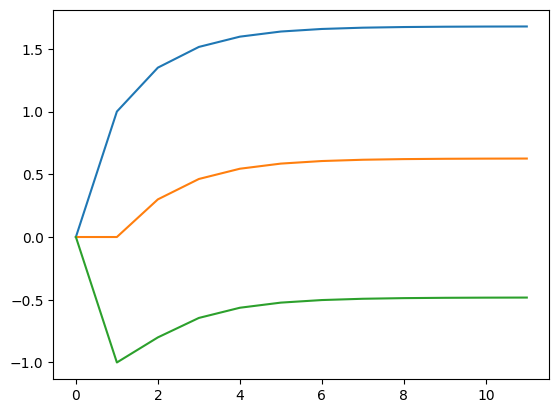

In [26]:
import matplotlib.pyplot as plt

history = policy_evaluation_history(optimal_policy, P, R, gamma, delta)

plt.plot([v[0] for v in history])
plt.plot([v[1] for v in history])
plt.plot([v[2] for v in history])

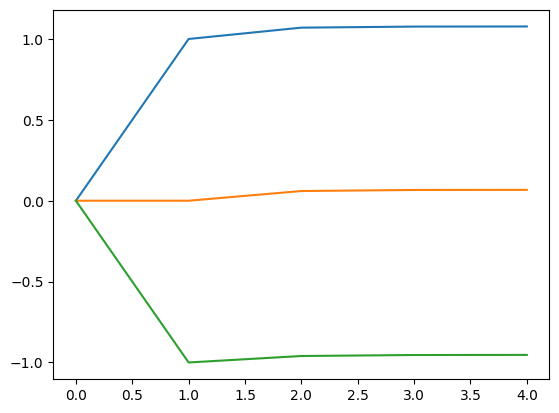

In [27]:
history = policy_evaluation_history(optimal_policy, P, R, 0.1, delta)

plt.plot([v[0] for v in history])
plt.plot([v[1] for v in history])
plt.plot([v[2] for v in history])

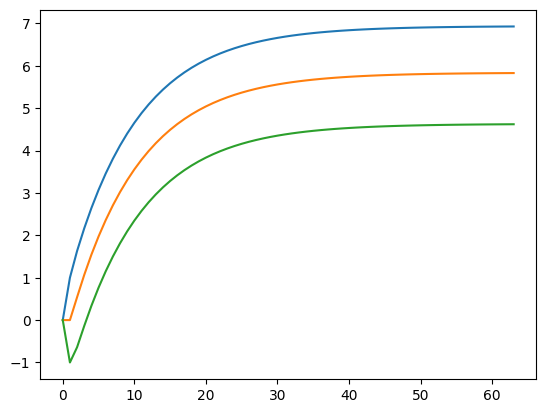

In [28]:
history = policy_evaluation_history(optimal_policy, P, R, 0.9, delta)

plt.plot([v[0] for v in history])
plt.plot([v[1] for v in history])
plt.plot([v[2] for v in history])

# Имитация окружающей среды FrozenLake

Задача в перемещении агента из нач. сост. в конечное в сеточном мире, избегая ловушек. 

In [1]:
from pyvirtualdisplay import Display
from typing import *
import torch
import gym
import matplotlib.pyplot as plt

In [30]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array")
n_states = env.observation_space.n
n_actions = env.action_space.n

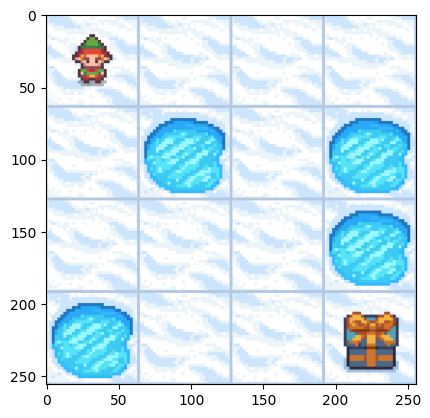

In [31]:
env.reset()
img = plt.imshow(env.render())

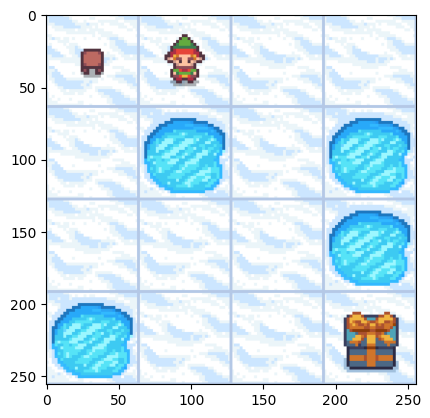

In [32]:
info = env.step(1)
img = plt.imshow(env.render())

In [33]:
info

(1, 0.0, False, False, {'prob': 0.3333333333333333})

In [34]:
def run_episode(env: gym.Env, policy: torch.Tensor) -> float:
    state = env.reset()[0]
    total_reward = 0
    is_done = False
    while not is_done:
        action = policy[state].item()
        state, reward, is_done, _, _ = env.step(action)
        total_reward += reward
    return total_reward

In [ ]:
n_episodes = 300
total_rewards: list[float] = list()
for episode in range(n_episodes):
    random_policy = torch.randint(0, n_actions, (n_states,))
    total_rewards.append(run_episode(env, random_policy))
    print(episode)
print(total_rewards)
print(sum(total_rewards) / n_episodes)

In [37]:
while True:
    random_policy = torch.randint(n_actions, size=(n_states,))
    total_reward = run_episode(env, random_policy)
    if total_reward == 1:
        best_policy = random_policy
        break

In [38]:
from pprint import pprint

pprint(env.P[14][0])

[(0.3333333333333333, 10, 0.0, False),
 (0.3333333333333333, 13, 0.0, False),
 (0.3333333333333333, 14, 0.0, False)]


## Решение MDP с помощью Value Iteration

Теорема Банаха позв. решать уравнения оптимальности Беллмана через метод простой итерации.

Определим опреатор оптимальности Беллмана $F*$:
$$[F^*Q](s,a):=r(s,a)+\gamma\mathbb{E}_{s'}\underset{}{\max}$$

Если нек ф. $Q^~:s\times A \rightarrow \R$ удовл. ур. Беллмана, то $Q^~ = Q^*$

ЕслиМетод простой итерации сход. к $Q^*$ для любого нач. приближения. 

__Алгоритм Value Iteration__  
__Вход__: $\delta$ - критерий ост.
1) $\forall s: V_{k+1}(s):=\underset{a}{\max}[r(s,a)+\gamma\mathbb{E}_{s'}V_k(s')]$
2) ост.: $\underset{a}{\max}|V_k(s)-V_{k+1}(s)|<\delta$

__Выход__: $\pi(s):=\arg\underset{a}{\max}[r(s,a)+\gamma\mathbb{E}_{s'}V(s')]$

In [39]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array")
gamma = 0.99
delta = 0.0001

In [40]:
def value_iteration(env: gym.Env, gamma: float, delta: float) -> float:
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    V = torch.zeros(n_states)
    while True:
        V_new = torch.zeros(n_states)
        for state in range(n_states):
            v_action = torch.zeros(n_actions)
            for action in range(n_actions):
                for probability, new_state, reward, _ in env.P[state][action]:
                    v_action[action] += probability * (reward + gamma * V[new_state])
            V_new[state] = torch.max(v_action)
        difference = torch.max(torch.max(torch.abs(V - V_new)))
        V = V_new.clone()
        if difference <= delta:
            return V

In [41]:
V_optimal = value_iteration(env, gamma, delta)
V_optimal

tensor([0.5404, 0.4966, 0.4681, 0.4541, 0.5569, 0.0000, 0.3572, 0.0000, 0.5905,
        0.6421, 0.6144, 0.0000, 0.0000, 0.7410, 0.8625, 0.0000])

In [42]:
def extract_optimal_policy(env: gym.Env, V_optimal: torch.Tensor, gamma: float) -> torch.Tensor:
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    optimal_policy = torch.zeros(n_states)
    for state in range(n_states):
        v_action = torch.zeros(n_actions)
        for action in range(n_actions):
            for probability, new_state, reward, _ in env.P[state][action]:
                v_action[action] += probability * (reward + gamma * V_optimal[new_state])
        optimal_policy[state] = torch.argmax(v_action)
    return optimal_policy

In [43]:
extract_optimal_policy(env, V_optimal, gamma)

tensor([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])

In [44]:
n_episodes

300

In [45]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array")
delta = 0.0001

In [46]:
gammas = [0., 0.2, 0.4, 0.6, 0.8, 0.99, 1.]

avg_reward_gamma = []
for gamma in gammas:
    V_optimal = value_iteration(env, gamma, delta)
    optimal_policy = extract_optimal_policy(env, V_optimal, gamma)
    total_rewards = []
    for episode in range(n_episodes):
        total_reward = run_episode(env, optimal_policy)
        total_rewards.append(total_reward)
    avg_reward_gamma.append(sum(total_rewards) / n_episodes)

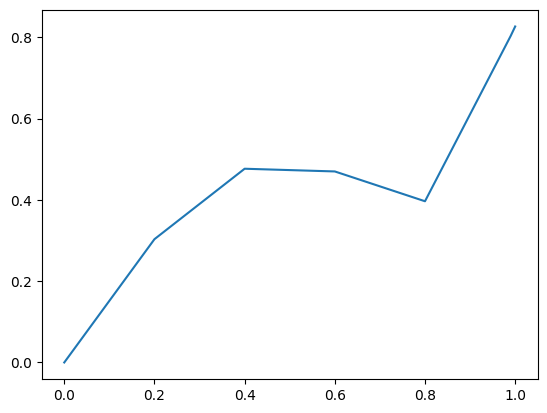

In [47]:
plt.plot(gammas, avg_reward_gamma)

## Решение MDP с помощью алгоритма итерации по стратегиям (Policy Iteration)

Алгоритм стотоит их 2-х этапов:
- Policy Evaluation: вычисление ценности дял тек. стратегии $\pi$
- Policy Improvement: улучшение стратегии $\pi(s)\leftarrow\arg\underset{a}{\max}Q^\pi(s,a)$

__Policy Iteration__:  
__Гиперпараметры__: $\delta$ - критерий ост. для __PolicyEvaluation__  
Иниц. $\pi_0(s)$ произвольно $\forall s\in S$  
На k шаге:
1. $V^{\pi_k}$ - Policy Evaluation $(\pi_k, \delta)$
2. $Q^{\pi_k}(s,a):=[r(s,a)+\delta\mathbb{E}_{s'}V^{\pi_k}(s')]$
3. $\pi_{k+1}(s):=\arg\underset{a}{\max}Q^{\pi_k}(s,a)$
4. критерий ост. $\pi_k=\pi_{k+1}$

Выход: $\pi_k$

In [48]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array")
gamma = 0.99
delta = 0.0001

In [49]:
def policy_evaluation(env: gym.Env, policy: Tensor, gamma: float, delta: float) -> Tensor:
    n_states = policy.shape[0]
    V = torch.zeros(n_states)
    while True:
        V_new = torch.zeros(n_states)
        for state in range(n_states):
            action = policy[state].item()
            for probability, new_state, reward, _ in env.P[state][action]:
                V_new[state] += probability * (reward + gamma * V[new_state])
        difference = torch.max(torch.abs(V - V_new))
        V = V_new
        if difference < delta:
            return V

In [50]:
def policy_improvement(env: gym.Env, V: Tensor, gamma: float) -> Tensor:
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    policy = torch.zeros(n_states)
    for state in range(n_states):
        v_action = torch.zeros(n_actions)
        for action in range(n_actions):
            for probability, new_state, reward, _ in env.P[state][action]:
                v_action[action] += probability * (reward + gamma * V[new_state])
        policy[state] = torch.argmax(v_action)
    return policy

In [51]:
def policy_iteration(env: gym.Env, gamma: float, delta: float) -> tuple[Tensor, Tensor]:
    n_states = env.observation_space.n
    policy = torch.zeros(n_states)
    while True:
        V = policy_evaluation(env, policy, gamma, delta)
        policy_new = policy_improvement(env, V, gamma)
        if torch.equal(policy, policy_new):
            return V, policy
        policy = policy_new

In [52]:
V_optimal, optimal_policy = policy_iteration(env, gamma, delta)

In [53]:
print(V_optimal, optimal_policy, sep="\n\n")

tensor([0.5404, 0.4966, 0.4681, 0.4541, 0.5569, 0.0000, 0.3572, 0.0000, 0.5905,
        0.6421, 0.6144, 0.0000, 0.0000, 0.7410, 0.8625, 0.0000])

tensor([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])


## Generalized Policy Iteration

__Алгоритм Generalized Policy Iteration__:
Гиперпараметры: N - количество шагов  
Иниц. $\pi(s), V(s) \forall s\in S$  
На k шаге:
1. Повторить N раз: 
$\forall s:V(s)\leftarrow \mathbb{E}_a[r(s,a)+\gamma\mathbb{E}_{s'}V(s')]$
2. $Q(s,a)\leftarrow r(s,a)+\gamma\mathbb{E}_{s'}V(s')$
3. $\pi(s)\leftarrow \arg\underset{a}{\max}Q(s,a)$

Алгоритмы RL классифицируются как model-free, если не исп. модель динамики среды $p(s'|s,a)$

Самый простой способ прквратить Policy Iteration в model-free метод: очередную стратегию $\pi_k$ отправить в среду, сыграть несколько эпизодов и оценить $Q^{\pi_k}$ по Монте-Карло:
$$Q^{\pi_k}\approx\frac{1}{N}\sum^{N}_{i=0}R(\tau_i), \tau_i\sim\pi_k|s_0=s, a_0=a$$

# Вычисление $\pi$ методом Монте-Карло

Поместим много случ. выбранных точек в квадрат со стороной 2: $(-1<x<1, -1<y<1)$, и посчитаем кол-во попавших в круг ед. радиуса.  
$S_{sq}=2^2=4$  
$S_{cr}=\pi\cdot 1^2=\pi$
Величиной $S_{sq}/S_{cr}=\frac{\pi}{4}$ оценим долю точек внутри круга.

$$V^\pi(s)\approx\frac{1}{N}\sum^{N}_{}$$

In [1]:
import torch
import math
import matplotlib.pyplot as plt
from typing import *
import gym

In [2]:
n_points = 1000000
points = torch.rand((n_points, 2)) * 2 - 1

In [3]:
n_count = 0
points_circle = []
for point in points:
    r = torch.sqrt(point[0]**2 + point[1]**2)
    if r <= 1:
        points_circle.append(point)
        n_count += 1
points_circle = torch.stack(points_circle)

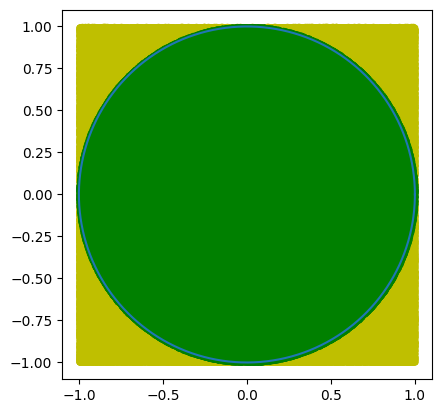

In [4]:
plt.axes().set_aspect("equal")
plt.plot(points[:, 0].numpy(), points[:, 1].numpy(), "y.")
plt.plot(points_circle[:, 0].numpy(), points_circle[:, 1].numpy(), "g.")
i = torch.linspace(0, 2 * math.pi, 1000)
plt.plot(torch.cos(i), torch.sin(i))

In [5]:
pi_estimated = 4 * (n_count / n_points)
pi_estimated

3.142972

In [6]:
def estimate_pi_mc(n_iterations: int) -> list[float]:
    n_count = 0
    n_points = 0
    points_circle = []
    pi_estimations = []
    for i in range(n_iterations):
        point = torch.rand(2) * 2 - 1
        r = torch.sqrt(point[0]**2 + point[1]**2)
        if r <= 1:
            points_circle.append(point)
            n_count += 1
        n_points += 1
        pi_estimated = 4 * (n_count / n_points)
        pi_estimations.append(pi_estimated)
    return pi_estimations

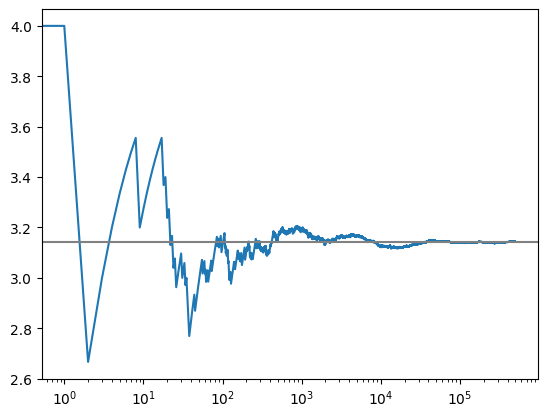

In [7]:
pi = estimate_pi_mc(500000)
plt.plot(pi)
plt.axhline(math.pi, color="gray")
plt.xscale("log")

In [8]:
print(sum(pi) / len(pi))

3.1409960725074897


In [129]:
# env.close()

## Оценивание 

In [10]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array")

In [11]:
def run_episode(env: gym.Env, policy: torch.Tensor) -> float:
    state = env.reset()[0]
    rewards = []
    states = []
    is_done = False
    while not is_done:
        action = policy[state].item()
        state, reward, is_done, _, _ = env.step(action)
        states.append(state)
        rewards.append(reward)
    states = torch.tensor(states)
    rewards = torch.tensor(rewards)
    return states, rewards

$$V^\pi(s)=\mathbb{E}_{\tau\sim\pi|s_0=s}\sum_{t\geq 0}\gamma^t r_t$$
$$Q^\pi(s,a)=\mathbb{E}_{\tau\sim\pi|s_0=s,a_0=a}\sum_{t\geq 0}\gamma^tr_t$$

$Q^{\pi_k}$ по Монте-Карло:
$$Q^{\pi_k}(s,a)\approx\frac{1}{N}\sum$$
$$G_t=\sum_k\gamma^kR_{t+k+1}$$

Для каждого шага эпизода $(t=T-1, T-2...0)~G_{t+1}=\gamma G_t+T_{t+1}$

In [12]:
def mc_prediction_first_visit(env: gym.Env, policy: torch.Tensor, gamma: float, n_episodes: int) -> Any:
    n_states = env.observation_space.n
    V = torch.zeros(n_states)
    N = torch.zeros(n_states)
    for episode in range(n_episodes):
        states_new, rewards_new = run_episode(env, policy)
        return_t = 0
        first_visit = torch.zeros(n_states)
        G = torch.zeros(n_states)
        for state_new, reward_new in zip(reversed(states_new), reversed(rewards_new)):
            return_t = gamma * return_t + reward_new
            G[state_new] = return_t
            first_visit[state_new] = 1
        for state in range(n_states):
             if first_visit[state] > 0:
                 V[state] += G[state]
                 N[state] += 1
    for state in range(n_states):
        if N[state] > 0:
            V[state] = V[state] / N[state]
    return V

In [13]:
gamma = 0.99
n_episodes = 10000

In [14]:
optimal_policy = torch.tensor([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])

In [15]:
value = mc_prediction_first_visit(env, optimal_policy, gamma, n_episodes)

In [16]:
f"Функция ценности, получ. методом первого MX посещения: {value}"

'Функция ценности, получ. методом первого MX посещения: tensor([0.5333, 0.4841, 0.4577, 0.4505, 0.5500, 0.0000, 0.3404, 0.0000, 0.5826,\n        0.6344, 0.6027, 0.0000, 0.0000, 0.7353, 0.8528, 1.0000])'

In [17]:
def mc_prediction_every_visit(env: gym.Env, policy: torch.Tensor, gamma: float, n_episodes: int) -> Any:
    n_states = env.observation_space.n
    V = torch.zeros(n_states)
    N = torch.zeros(n_states)
    G = torch.zeros(n_states)
    for episode in range(n_episodes):
        states_new, rewards_new = run_episode(env, policy)
        return_t = 0
        for state_new, reward_new in zip(reversed(states_new)[1:], reversed(rewards_new)):
            return_t = gamma * return_t + reward_new
            G[state_new] = return_t
            N[state_new] += 1
        for state in range(n_states): # ?
             if N[state] > 0:
                 V[state] += G[state]
                 N[state] += 1
    for state in range(n_states):
        if N[state] > 0:
            V[state] = V[state] / N[state]
    return V

In [18]:
value = mc_prediction_every_visit(env, optimal_policy, gamma, n_episodes)

In [19]:
f"Функция ценности, получ. методом MX всех посещений: {value}"

'Функция ценности, получ. методом MX всех посещений: tensor([0.0366, 0.3160, 0.2203, 0.2120, 0.0455, 0.0000, 0.2330, 0.0000, 0.0671,\n        0.1231, 0.2394, 0.0000, 0.0000, 0.1710, 0.2477, 0.0000])'

# Предсказание методом Монте-Карло в игре блекджек

- Играем только против дилера
- Значение карт с числами равняется номинальным значением. Значение В, К или Д = 10. Значение туза = 1 или 11 в зависимости от выбора игрока
- Обе стороны получают по 2 карты
- Цель игры - набрать <=21 очков. >21 - проигрыш
- После того, как игрок увидел свои карты и первую карту дилера, игрок может выбрать новую карту или не брать.

In [20]:
env = gym.make("Blackjack-v1", render_mode="rgb_array")

In [21]:
n_states = env.observation_space
n_actions = env.action_space
f"{n_states},\n{n_actions}"

'Tuple(Discrete(32), Discrete(11), Discrete(2)),\nDiscrete(2)'

In [22]:
env.reset()

((13, 3, False), {})

1) количество очков у игрока  
2) очки у сдающего  
3) признак наличия туза у игрока

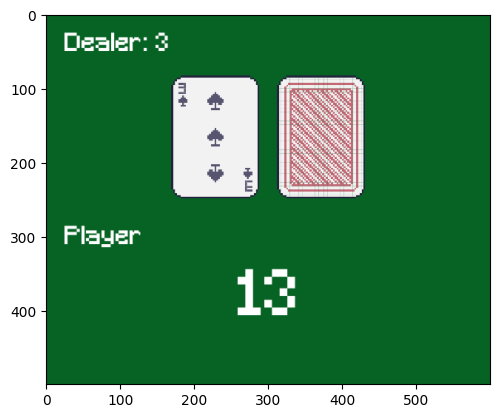

In [23]:
plt.imshow(env.render());

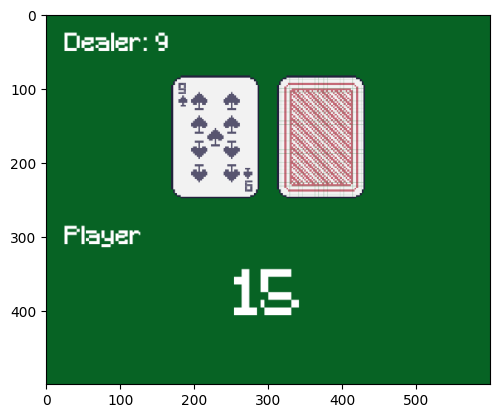

In [24]:
env.reset()
plt.imshow(env.render());

In [25]:
env.step(1)

((20, 9, False), 0.0, False, False, {})

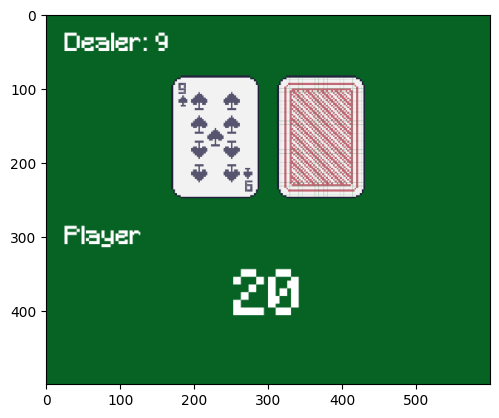

In [26]:
plt.imshow(env.render());

In [27]:
env.step(0)

((20, 9, False), 0.0, True, False, {})

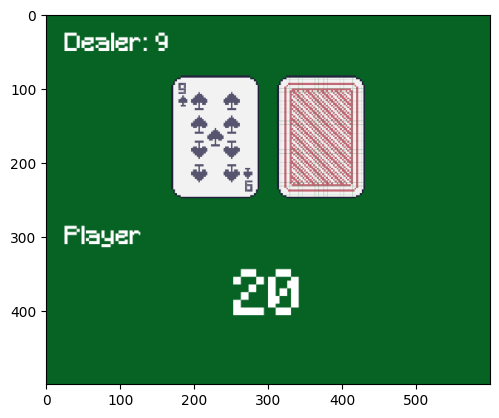

In [28]:
plt.imshow(env.render());

In [29]:
def run_episode(env: gym.Env, hold_score: int) -> tuple[list, list]:
    state = env.reset()[0]
    states = [state]
    rewards = [0]
    is_done = False
    while not is_done:
        action = 1 if state[0] < hold_score else 0
        state, reward, is_done, _, _ = env.step(action)
        rewards.append(reward)
        states.append(state)
    return states, rewards

In [30]:
hold_score = 18
gamma = 1

In [31]:
states, rewards = run_episode(env, hold_score)
for i in zip(states, rewards, strict=True):
    print(i)

((17, 10, False), 0)
((27, 10, False), -1.0)


In [32]:
from collections import defaultdict


def mc_prediction_first_visit(env: gym.Env, hold_score: int, gamma: float, n_episodes: int) -> defaultdict:
    V = defaultdict(float)
    N = defaultdict(int)
    for episode in range(n_episodes):
        states_new, rewards_new = run_episode(env, hold_score)
        return_t = 0
        G = {}
        for state, reward in zip(states_new[1::-1], rewards_new[::-1]):
            return_t = gamma * return_t + reward
            G[state] = return_t
        for state, return_t in G.items():
            if state[0] <= 21:
                V[state] += return_t
                N[state] += 1
    for state in V.keys(): 
        V[state] = V[state] / N[state]
    return V

In [33]:
hold_score = 18
gamma = 1
n_episodes = 1000

In [34]:
values = mc_prediction_first_visit(env, hold_score, gamma, n_episodes)

In [ ]:
values

In [36]:
len(values)

241

In [32]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [33]:
def plot_surface(X, Y, Z, title) -> None:
    fig = plt.figure(figsize=(16, 6))
    ax = fig.add_subplot(111, projection="3d")
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, vmin=-1.0, vmax=1.0)
    ax.set_xlabel("Очки игрока")
    ax.set_ylabel("Открытая карта сдающего")
    # ax.set_ztitle("Ценность")
    ax.set_title(title)
    ax.view_init(ax.elev, -120)
    fig.colorbar(surf)
    plt.show()

In [34]:
def plot_blackjack_values(V):
    player_sum_range = range(12, 22)
    dealer_show_range = range(1, 11)
    X, Y = torch.meshgrid([torch.Tensor(player_sum_range), torch.Tensor(dealer_show_range)])
    values_to_plot = torch.zeros((len(player_sum_range), len(dealer_show_range), 2))
    for i, player in enumerate(player_sum_range):
        for j, dealer in enumerate(dealer_show_range):
            for k, ace in enumerate([False, True]):
                values_to_plot[i, j, k] = V[(player, dealer, ace)]
    plot_surface(X, Y, values_to_plot[:, :, 0].numpy(), "")
    plot_surface(X, Y, values_to_plot[:, :, 1].numpy(), "")

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


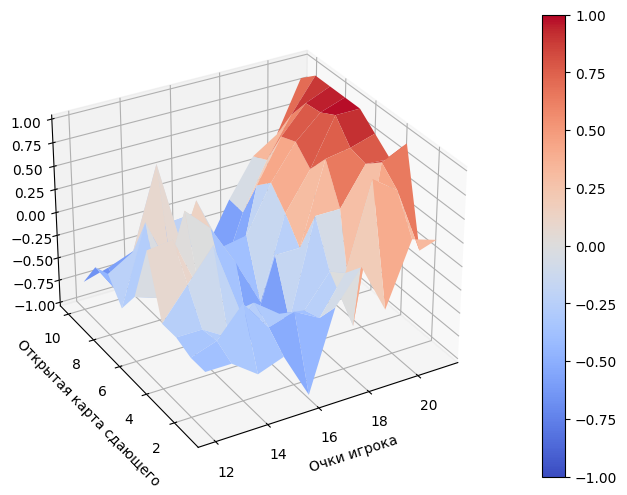

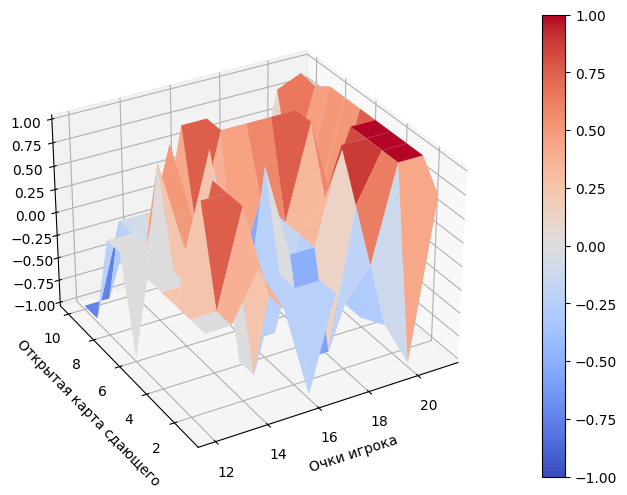

In [40]:
plot_blackjack_values(values)

In [41]:
import sys
sys.version

'3.10.13 (main, Nov 22 2023, 23:31:37) [GCC 13.2.1 20230912 [revision b96e66fd4ef3e36983969fb8cdd1956f551a074b]]'

# Управление методом Монте-Карло с единой стратегией

- Методы с единой стратегией (on-policy) обуч. оптимальной стратегии, выполняя стратегию, затем оценивая и улучшая её
- Методы с разд. стратегией (off-policy) обуч. оптимальной стратегии на данных, сгенерированных другой стратегией

Принцип работы управления MK с единой стратегией очень похож на алгоритм итерации по стратегиям в динамическом программировании, поскольку состоит из двух этапов: оценивания и улучшения.  
- На этапе оценивания вычисляется не функция ценности, а функция ценности действий Q-функция. Как и раньше, оценивание можно производить для первого посещения или для всех посещений
- На этапе улучшения стратегии обн. путём сопоставления каждому состоянию оптимального действия $\pi(s)=\arg\underset{a}{\max}Q(s,a)$

In [42]:
def run_episode(env: gym.Env, Q: dict[Any, torch.Tensor], n_actions: int) -> tuple[list, list, list]:
    state = env.reset()[0]
    states = []
    rewards = []
    actions = []
    is_done = False
    action = torch.randint(0, n_actions, (1,)).item()
    while True:
        states.append(state)
        actions.append(action)
        state, reward, is_done, _, _ = env.step(action)
        rewards.append(reward)
        if is_done:
            break
        action = torch.argmax(Q[state]).item()
    return states, actions, rewards

In [43]:
from collections import defaultdict

def mc_control_on_policy(env: gym.Env, gamma: float, n_episodes: int) -> Any:
    n_actions = env.action_space.n
    Q = defaultdict(lambda: torch.empty(n_actions))
    N = defaultdict(int)
    G_sum = defaultdict(float)
    for episode in range(n_episodes):
        states_t, actions_t, rewards_t = run_episode(env, Q, n_actions)
        return_t = 0
        G = {}
        for state_t, action_t, reward_t in zip(states_t[::-1], actions_t[::-1], rewards_t[::-1]):
            return_t = return_t * gamma + reward_t
            G[(state_t, action_t)] = return_t
            for state_action, return_t in G.items():
                state, action = state_action
                if state[0] <= 21:
                    # print(state)
                    G_sum[state_action] += return_t
                    N[state_action] += 1
                    Q[state][action] = G_sum[state_action] / N[state_action]
    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [63]:
gamma = 1
n_episodes = 100000

In [ ]:
optimal_Q, optimal_policy = mc_control_on_policy(env, gamma, n_episodes)

In [ ]:
optimal_policy

In [ ]:
optimal_Q

In [67]:
optimal_values = defaultdict(float)
for state, action_values in optimal_Q.items():
    optimal_values[state] = torch.max(action_values).item()

In [ ]:
optimal_values

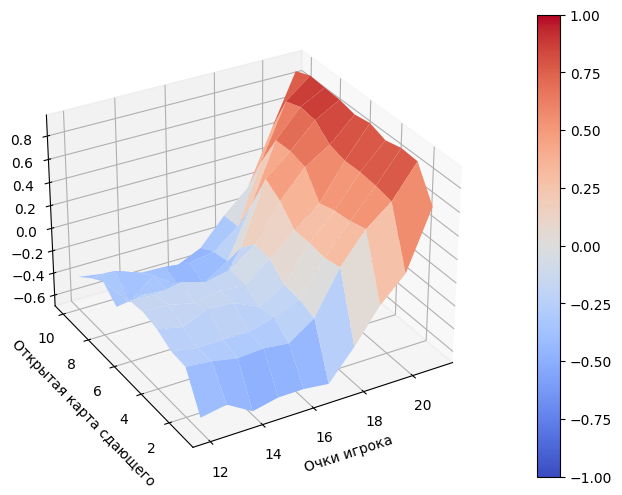

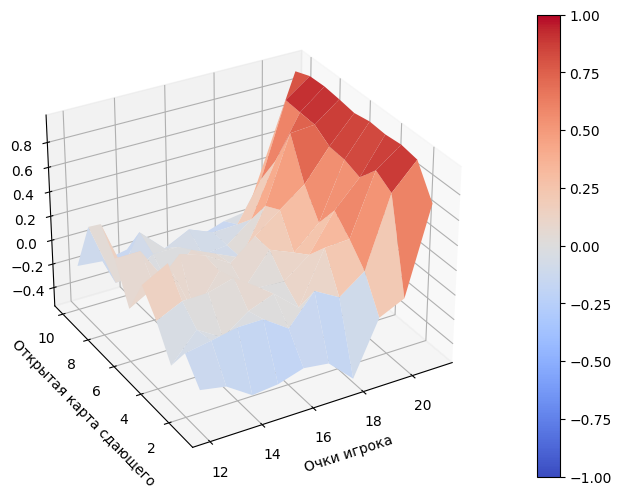

In [69]:
plot_blackjack_values(optimal_values)

In [71]:
hold_score = 18
hold_policy = dict()
for player in range(2, 22):
    for dealer in range(1, 11):
        action = 1 if player <= hold_score else 0
        hold_policy[(player, dealer, False)] = action
        hold_policy[(player, dealer, True)] = action

In [79]:
def simulate_episode(env: gym.Env, policy: dict[tuple, int]) -> float:
    state = env.reset()[0]
    is_done = False
    while not is_done:
        action = policy[state]
        state, reward, is_done, _, _ = env.step(action)
    return reward

In [80]:
n_episodes = 100000
n_win_optimal = 0
n_win_hold = 0
n_lose_optimal = 0
n_lose_hold = 0

In [81]:
for episode in range(n_episodes):
    reward = simulate_episode(env, optimal_policy)
    if reward > 0:
        n_win_optimal += 1
    else:
        n_lose_optimal += 1
    
    reward = simulate_episode(env, hold_policy)
    if reward > 0:
        n_win_hold += 1
    else:
        n_lose_hold += 1


In [83]:
print(n_win_optimal / n_episodes)
print(n_win_hold / n_episodes)

0.42865
0.36405


# Управление методом Монте-Карло с $\epsilon$-жадной стратегией

- $\epsilon$ - принимает значения от 0 до 1, опр. вероятность, с которой выб. сл. действие: $\pi(s,a)=\frac{\epsilon}{|A|}$, где $|A|$ - кол-во возм. действий
- жадность - с вероятностью $1-\epsilon$ выб. действик, для кот. ценность 

In [4]:
import torch
from typing import *
import matplotlib.pyplot as plt
from collections import defaultdict

In [94]:
def run_episode(env: gym.Env, Q: dict[Any, torch.Tensor], epsilon: float, n_actions: int) -> tuple[list, list, list]:
    state = env.reset()[0]
    states = []
    rewards = []
    actions = []
    is_done = False
    while not is_done:
        probabilities: torch.Tensor = torch.ones(n_actions) * epsilon / n_actions
        best_action: int = torch.argmax(Q[state]).item()
        probabilities[best_action] += 1 - epsilon
        action = torch.multinomial(probabilities, 1).item()
        states.append(state)
        actions.append(action)
        state, reward, is_done, _, _ = env.step(action)
        rewards.append(reward)
    return states, actions, rewards

In [95]:
def mc_control_on_policy(env: gym.Env, gamma: float, n_episodes: int, epsilon: float) -> Any:
    n_actions = env.action_space.n
    Q = defaultdict(lambda: torch.empty(n_actions))
    N = defaultdict(int)
    G_sum = defaultdict(float)
    for episode in range(n_episodes):
        states_t, actions_t, rewards_t = run_episode(env, Q, epsilon, n_actions)
        return_t = 0
        G = {}
        for state_t, action_t, reward_t in zip(states_t[::-1], actions_t[::-1], rewards_t[::-1]):
            return_t = return_t * gamma + reward_t
            G[(state_t, action_t)] = return_t
            for state_action, return_t in G.items():
                state, action = state_action
                if state[0] <= 21:
                    # print(state)
                    G_sum[state_action] += return_t
                    N[state_action] += 1
                    Q[state][action] = G_sum[state_action] / N[state_action]
    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [96]:
gamma = 1
n_episodes = 100000

In [97]:
optimal_Q, optimal_policy = mc_control_on_policy(env, gamma, n_episodes, 0.5)

In [ ]:
optimal_policy

In [ ]:
optimal_Q

In [100]:
optimal_values = defaultdict(float)
for state, action_values in optimal_Q.items():
    optimal_values[state] = torch.max(action_values).item()

In [ ]:
optimal_values

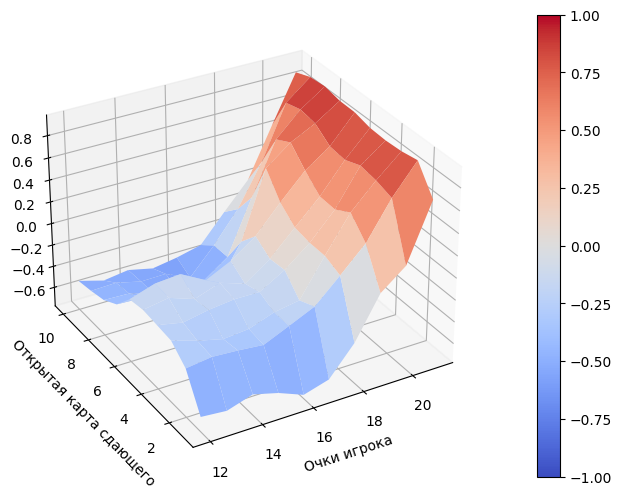

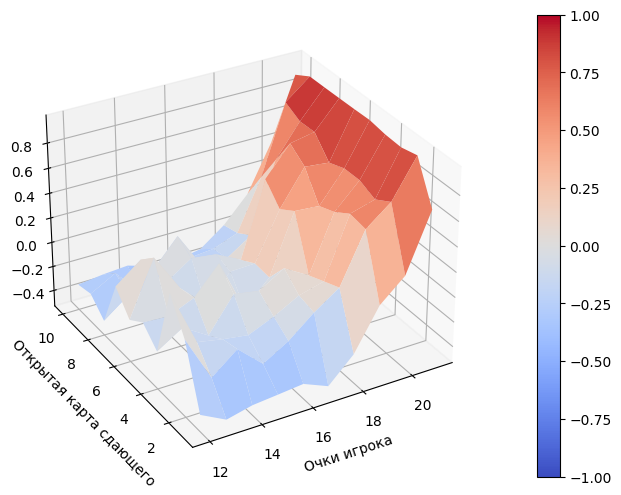

In [102]:
plot_blackjack_values(optimal_values)

In [103]:
hold_score = 18
hold_policy = dict()
for player in range(2, 22):
    for dealer in range(1, 11):
        action = 1 if player <= hold_score else 0
        hold_policy[(player, dealer, False)] = action
        hold_policy[(player, dealer, True)] = action

In [104]:
def simulate_episode(env: gym.Env, policy: dict[tuple, int]) -> float:
    state = env.reset()[0]
    is_done = False
    while not is_done:
        action = policy[state]
        state, reward, is_done, _, _ = env.step(action)
    return reward

In [105]:
n_episodes = 100000
n_win_optimal = 0
n_win_hold = 0
n_lose_optimal = 0
n_lose_hold = 0

In [106]:
for episode in range(n_episodes):
    reward = simulate_episode(env, optimal_policy)
    if reward > 0:
        n_win_optimal += 1
    else:
        n_lose_optimal += 1
    
    reward = simulate_episode(env, hold_policy)
    if reward > 0:
        n_win_hold += 1
    else:
        n_lose_hold += 1


In [107]:
print(n_win_optimal / n_episodes)
print(n_win_hold / n_episodes)

0.42861
0.36331


# Управление методом Монте-Карло с разделенной стратегией

Метод off policy оптимизирует целевую стратегию $\pi$ на данных, сгенерированных поведенческой стратегией $b$. Целевая стратегия исп. лучшие действия, тогда как пов. служит для исследования. Целевая стратегия жадная отн. своей текузей Q-функции, а пов. генерирует поведение, чтобы у целевой функции были данные, на кот. можно обучаться.

В эпизодах, встречающихся в обеих стратегиях, можно использовать только общие шаги. Чтобы обучить целевую стратегию с помощью другой, применяется __выборка по значимости__.

Взвешенная значимость пары состояние-действие: $w_t=\prod^T_{k=t}[\pi(a_k|s_k)/b(a_k|s_k)]$,  
где $\pi(a_k|s_k)$ - вероятность выбора $a_k$ в состоянии $s_k$ при следовании целевой стратегии; $b(a_k|s_k)$ - вер. выбора $a_k$ в состоянии $s_k$ при следовании поведенческой стратегии.

In [8]:
def get_random_policy(n_actions: int) -> Callable[[int], torch.Tensor]:
    return lambda state: torch.ones(n_actions) / n_actions

In [113]:
def run_episode(env: gym.Env, b_policy: Callable[[int], torch.Tensor]) -> tuple[list, list, list]:
    state = env.reset()[0]
    states = []
    rewards = []
    actions = []
    is_done = False
    while not is_done:
        probabilities: torch.Tensor = b_policy(state)
        action = torch.multinomial(probabilities, 1).item()
        states.append(state)
        actions.append(action)
        state, reward, is_done, _, _ = env.step(action)
        rewards.append(reward)
    return states, actions, rewards

In [114]:
from collections import defaultdict

def mc_control_off_policy(env: gym.Env, gamma: float, n_episodes: int, b_policy: Callable[[int], torch.Tensor]) -> Any:
    n_actions = env.action_space.n
    Q = defaultdict(lambda: torch.empty(n_actions))
    N = defaultdict(int)
    G_sum = defaultdict(float)
    for episode in range(n_episodes):
        W = {}
        w = 1
        states_t, actions_t, rewards_t = run_episode(env, b_policy)
        return_t = 0
        G = {}
        for state_t, action_t, reward_t in zip(states_t[::-1], actions_t[::-1], rewards_t[::-1]):
            return_t = return_t * gamma + reward_t
            G[(state_t, action_t)] = return_t
            W[(state_t, action_t)] = w
            if action_t != torch.argmax(Q[state_t]).item():
                break
            w *= 1. / b_policy(state_t)[action_t]
        for state_action, return_t in G.items():
            state, action = state_action
            if state[0] <= 21:
                # print(state)
                G_sum[state_action] += return_t
                N[state_action] += 1
                Q[state][action] = G_sum[state_action] / N[state_action]
    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [115]:
gamma = 1
n_episodes = 100000

In [118]:
optimal_Q, optimal_policy = mc_control_off_policy(env, gamma, n_episodes, get_random_policy(env.action_space.n))

In [ ]:
optimal_policy

In [ ]:
optimal_Q

In [121]:
optimal_values = defaultdict(float)
for state, action_values in optimal_Q.items():
    optimal_values[state] = torch.max(action_values).item()

In [ ]:
optimal_values

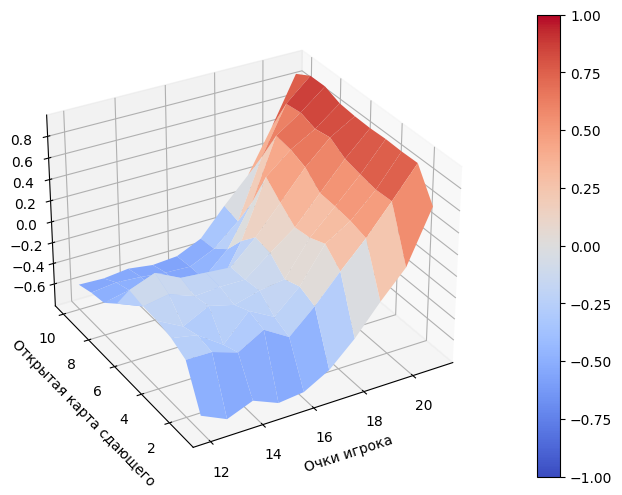

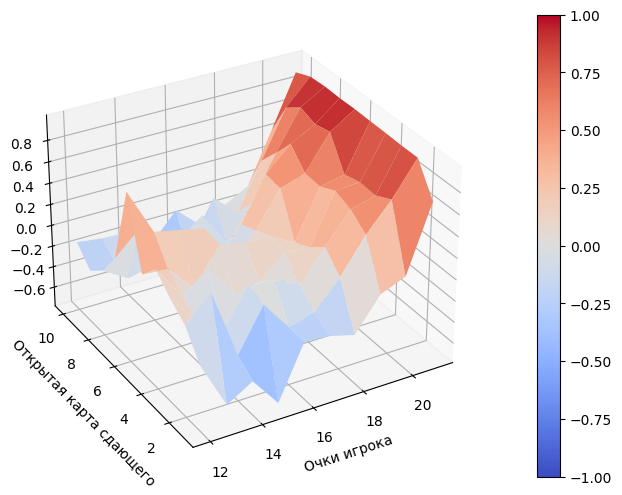

In [123]:
plot_blackjack_values(optimal_values)

In [124]:
hold_score = 18
hold_policy = dict()
for player in range(2, 22):
    for dealer in range(1, 11):
        action = 1 if player <= hold_score else 0
        hold_policy[(player, dealer, False)] = action
        hold_policy[(player, dealer, True)] = action

In [125]:
def simulate_episode(env: gym.Env, policy: dict[tuple, int]) -> float:
    state = env.reset()[0]
    is_done = False
    while not is_done:
        action = policy[state]
        state, reward, is_done, _, _ = env.step(action)
    return reward

In [126]:
n_episodes = 100000
n_win_optimal = 0
n_win_hold = 0
n_lose_optimal = 0
n_lose_hold = 0

In [127]:
for episode in range(n_episodes):
    reward = simulate_episode(env, optimal_policy)
    if reward > 0:
        n_win_optimal += 1
    else:
        n_lose_optimal += 1
    
    reward = simulate_episode(env, hold_policy)
    if reward > 0:
        n_win_hold += 1
    else:
        n_lose_hold += 1


In [128]:
print(n_win_optimal / n_episodes)
print(n_win_hold / n_episodes)

0.4301
0.36599


# Разработка управления методом Монте-Карло со взвешенной выборкой по значимости

В методе Монте-Карло Q-функция выч. в конце, когда известны все доходы в n эпизодах.

1) on policy $$Q_n=\left(\sum^n_{i=1}G_k\right)/n$$
2) off policy $$Q_n=\left(\sum^n_{i=1}w_kG_k\right)/n$$
для получения более эффективной оценки можно понизить дисперсию: $$Q_n=\left(\sum^n_{i=1}w_kG_k\right)/\sum^n_{i=1}w_k$$

In [2]:
env = gym.make("Blackjack-v1", render_mode="rgb_array")
n_states = env.observation_space
n_actions = env.action_space
f"{n_states},\n{n_actions}"

'Tuple(Discrete(32), Discrete(11), Discrete(2)),\nDiscrete(2)'

In [3]:
def run_episode(env: gym.Env, b_policy: Callable[[int], torch.Tensor]) -> tuple[list, list, list]:
    state = env.reset()[0]
    states = []
    rewards = []
    actions = []
    is_done = False
    while not is_done:
        probabilities: torch.Tensor = b_policy(state)
        action = torch.multinomial(probabilities, 1).item()
        states.append(state)
        actions.append(action)
        state, reward, is_done, _, _ = env.step(action)
        rewards.append(reward)
    return states, actions, rewards

In [24]:
from collections import defaultdict

def mc_control_off_policy_weighted(env: gym.Env, gamma: float, n_episodes: int, b_policy: Callable[[int], torch.Tensor]) -> Any:
    n_actions = env.action_space.n
    Q = defaultdict(lambda: torch.empty(n_actions))
    N = defaultdict(int)
    G_sum = defaultdict(float)
    for episode in range(n_episodes):
        W = {}
        w = 1
        states_t, actions_t, rewards_t = run_episode(env, b_policy)
        return_t = 0
        G = {}
        for state_t, action_t, reward_t in zip(states_t[::-1], actions_t[::-1], rewards_t[::-1]):
            return_t = return_t * gamma + reward_t
            G[(state_t, action_t)] = return_t
            W[(state_t, action_t)] = w
            if action_t != torch.argmax(Q[state_t]).item():
                break
            w *= 1. / b_policy(state_t)[action_t]
        for state_action, return_t in G.items():
            state, action = state_action
            if state[0] <= 21:
                # print(state)
                G_sum[state_action] += return_t * W[state_action]
                N[state_action] += W[state_action]
                Q[state][action] = G_sum[state_action] / N[state_action]
    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [25]:
gamma = 1
n_episodes = 100000

In [26]:
optimal_Q, optimal_policy = mc_control_off_policy_weighted(env, gamma, n_episodes, get_random_policy(env.action_space.n))

In [ ]:
optimal_policy

In [ ]:
optimal_Q

In [29]:
optimal_values = defaultdict(float)
for state, action_values in optimal_Q.items():
    optimal_values[state] = torch.max(action_values).item()

In [ ]:
optimal_values

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


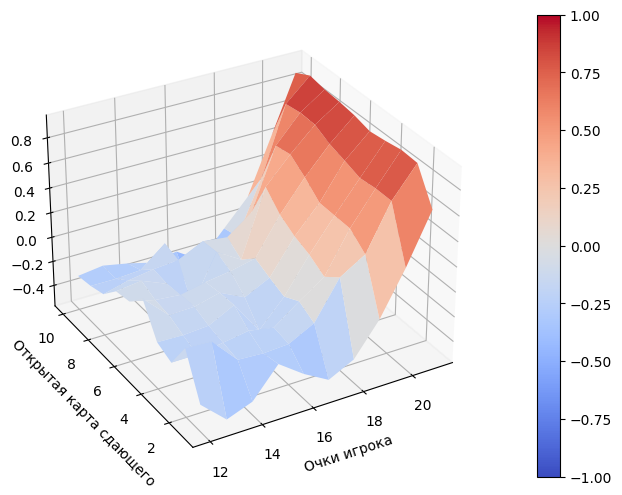

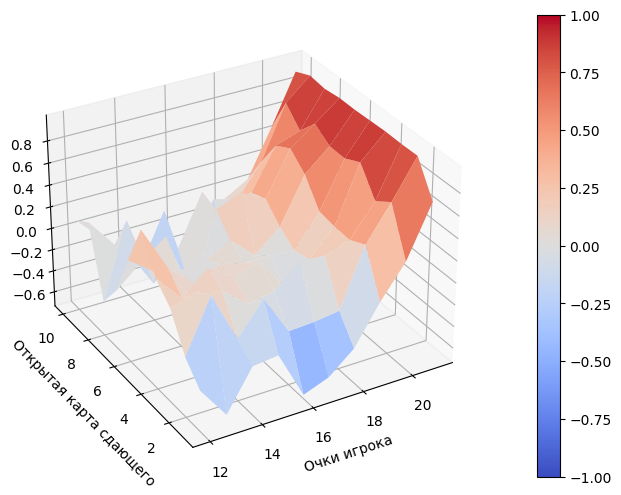

In [35]:
plot_blackjack_values(optimal_values)

In [36]:
hold_score = 18
hold_policy = dict()
for player in range(2, 22):
    for dealer in range(1, 11):
        action = 1 if player <= hold_score else 0
        hold_policy[(player, dealer, False)] = action
        hold_policy[(player, dealer, True)] = action

In [37]:
def simulate_episode(env: gym.Env, policy: dict[tuple, int]) -> float:
    state = env.reset()[0]
    is_done = False
    while not is_done:
        action = policy[state]
        state, reward, is_done, _, _ = env.step(action)
    return reward

In [38]:
n_episodes = 100000
n_win_optimal = 0
n_win_hold = 0
n_lose_optimal = 0
n_lose_hold = 0

In [39]:
for episode in range(n_episodes):
    reward = simulate_episode(env, optimal_policy)
    if reward > 0:
        n_win_optimal += 1
    else:
        n_lose_optimal += 1
    
    reward = simulate_episode(env, hold_policy)
    if reward > 0:
        n_win_hold += 1
    else:
        n_lose_hold += 1


In [40]:
print(n_win_optimal / n_episodes)
print(n_win_hold / n_episodes)

0.4249
0.36508


Применим идею стохастической аппроксимации для решения уравнений Беллмана.

$$y=r+\gamma Q(s',a')$$

который наз. Bellman target. Получ. формулу обновления:

$$Q_{k+1}(s,a)\leftarrow Q_k(s,a)\alpha_k(r+\gamma Q(s',a') - Q(s,a))$$

Выражение $Q_k(s,a)\alpha_k(r+\gamma Q(s',a') - Q(s,a))$ - отличие сэмпла от текущей оценки среднего. Получаем TD-backup.

Рассм. только одну версию будущего и смотрим на один шаг вперед, приближая все дальнейшее будущее своей собс. тек. аппроксимацией. Это позв. учиться, не проходя эпизоды до конца.

# Q-learning

Будем обновлять стратегию $\pi(s)=\arg\underset{a}{\max}Q_k(s,a)$ после каждого шага в среде и каждого обновления Q-функции. Тогда
$$y=t+\gamma Q_k(s',a') = r + \gamma Q_k(s', \pi_k(s'))=r + \gamma Q_k(s', \arg\underset{a'}{\max}Q_k(s', a'))=r+\gamma\underset{a'}{\max}Q_k(s',a')$$

Для перехода (s,a,r,s') обновляется только одна ячейка приближения Q-функция:
$$Q_{k+1}(s,a)=Q_k(s,a)+\alpha_k(r(s,a)+\gamma\underset{a'}{\max}Q_k(s',a')-Q_k(s,a))$$

In [42]:
env = gym.make("CliffWalking-v0", render_mode="rgb_array")

In [44]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [46]:
env.reset()

(36, {'prob': 1})

In [59]:
new_state, reward, is_done, _, info = env.step(1)
new_state, reward, is_done, info

(13, -1, False, {'prob': 1.0})

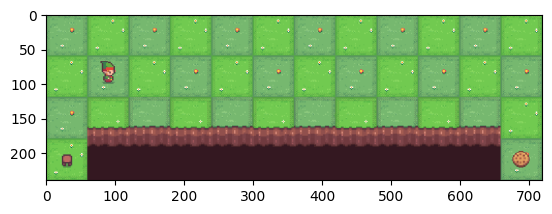

In [60]:
plt.imshow(env.render());

In [79]:
from collections import defaultdict

def epsilon_greedy_policy(n_actions: int, Q: torch.Tensor, state: int, epsilon: float) -> Any:
    probabilities = torch.ones(n_actions) * epsilon / n_actions
    best_action = torch.argmax(Q[state]).item()
    probabilities[best_action] += 1. - epsilon
    return torch.multinomial(probabilities, 1).item()

In [81]:
def q_learning(env: gym.Env, gamma: float, n_episodes: int, alpha: float, epsilon: float) -> tuple[dict, dict]:
    n_actions = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_actions))
    for episode in range(n_episodes):
        print(episode)
        state, _ = env.reset()
        is_done = False
        while not is_done:
            action = epsilon_greedy_policy(n_actions, Q, state, epsilon)
            new_state, reward, is_done, _, info = env.step(action)
            td_delta = reward + gamma * torch.max(Q[new_state]) - Q[state][action]
            Q[state][action] = alpha * td_delta

            state = new_state
    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [82]:
gamma = 1
alpha = 0.4
n_episodes = 5000
epsilon = 0.1

In [ ]:
optimal_Q, optimal_policy = q_learning(env, gamma, n_episodes, alpha, epsilon)

In [ ]:
optimal_Q

In [ ]:
optimal_policy

In [86]:
length_episode = [0] * n_episodes
total_reward_episode = [0] * n_episodes

In [87]:
def q_learning(env: gym.Env, gamma: float, n_episodes: int, alpha: float, epsilon: float) -> tuple[dict, dict]:
    n_actions = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_actions))
    for episode in range(n_episodes):
        # print(episode)
        state, _ = env.reset()
        is_done = False
        while not is_done:
            action = epsilon_greedy_policy(n_actions, Q, state, epsilon)
            new_state, reward, is_done, _, info = env.step(action)
            td_delta = reward + gamma * torch.max(Q[new_state]) - Q[state][action]
            Q[state][action] = alpha * td_delta
            length_episode[episode] += 1
            total_reward_episode[episode] += reward

            state = new_state
    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [88]:
optimal_Q, optimal_policy = q_learning(env, gamma, n_episodes, alpha, epsilon)

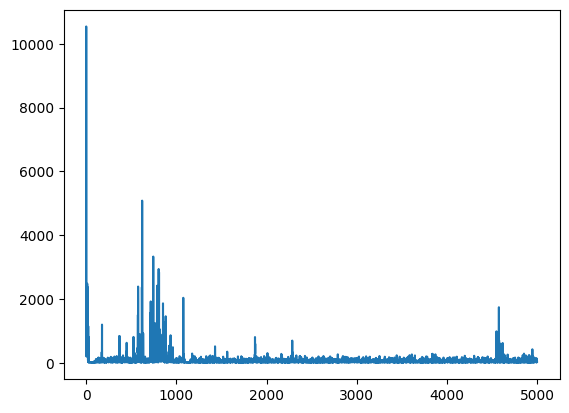

In [89]:
plt.plot(length_episode)

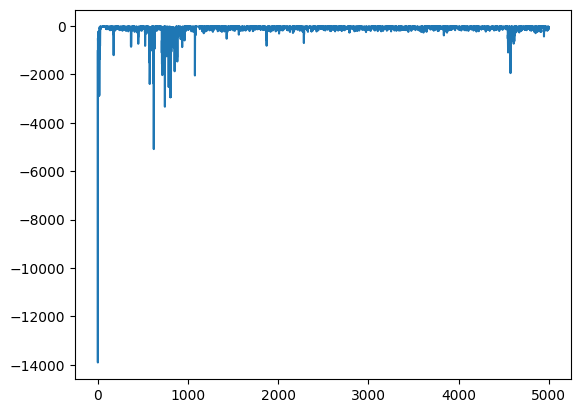

In [90]:
plt.plot(total_reward_episode)

# Алгоритм SARSA

In [95]:
n_episodes = 1000
length_episode = [0] * n_episodes
total_reward_episode = [0] * n_episodes

In [96]:
def sarsa(env: gym.Env, gamma: float, n_episodes: int, alpha: float, epsilon: float) -> tuple[dict, dict]:
    n_actions = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_actions))
    for episode in range(n_episodes):
        # print(episode)
        state, _ = env.reset()
        is_done = False
        action = epsilon_greedy_policy(n_actions, Q, state, epsilon)
        while not is_done:
            new_state, reward, is_done, _, info = env.step(action)
            new_action = epsilon_greedy_policy(n_actions, Q, state, epsilon)
            td_delta = reward + gamma * Q[new_state][new_action] - Q[state][action]
            Q[state][action] = alpha * td_delta
            length_episode[episode] += 1
            total_reward_episode[episode] += reward

            state = new_state
            action = new_action
    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [97]:
optimal_Q, optimal_policy = q_learning(env, gamma, n_episodes, alpha, epsilon)

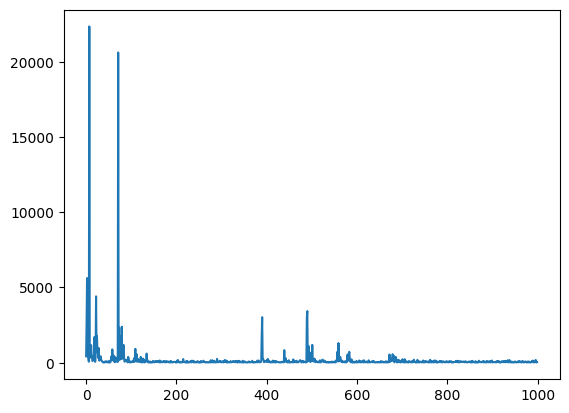

In [98]:
plt.plot(length_episode)

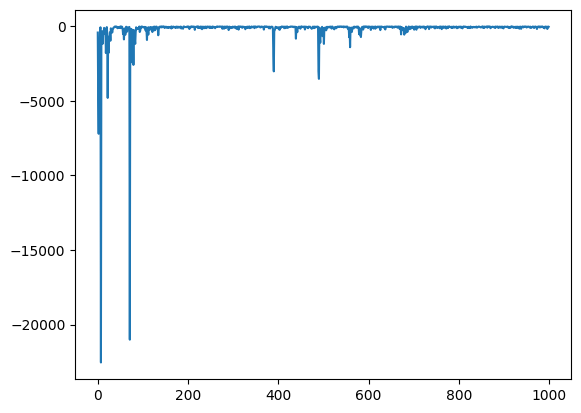

In [99]:
plt.plot(total_reward_episode)

# Решение задачи о такси

In [3]:
import gym
import torch
import matplotlib.pyplot as plt
from typing import *

In [4]:
env = gym.make("Taxi-v3", render_mode="rgb_array")

In [10]:
env.reset()

(207, {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)})

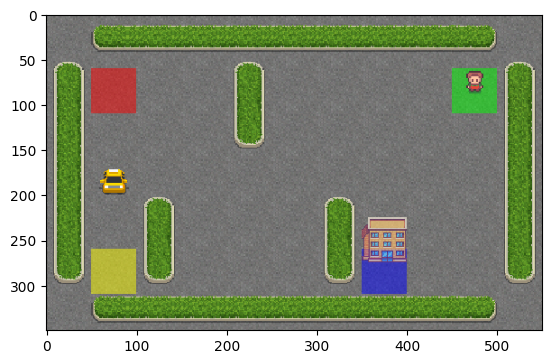

In [11]:
plt.imshow(env.render());

In [12]:
env.step(0)

(307,
 -1,
 False,
 False,
 {'prob': 1.0, 'action_mask': array([1, 1, 0, 0, 0, 0], dtype=int8)})

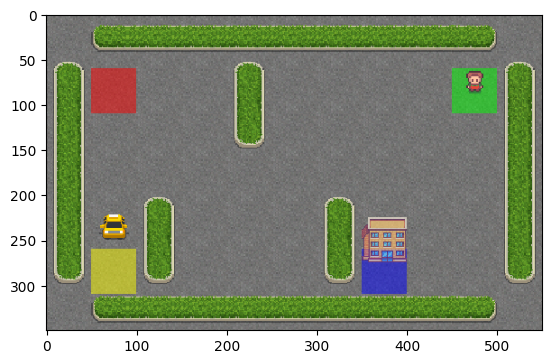

In [13]:
plt.imshow(env.render());

In [14]:
n_episodes = 10000
length_episode = [0] * n_episodes
total_reward_episode = [0] * n_episodes

In [20]:
gamma = 1
alpha = 0.4
epsilon = 0.1

In [17]:
from collections import defaultdict

def epsilon_greedy_policy(n_actions: int, Q: torch.Tensor, state: int, epsilon: float) -> Any:
    probabilities = torch.ones(n_actions) * epsilon / n_actions
    best_action = torch.argmax(Q[state]).item()
    probabilities[best_action] += 1. - epsilon
    return torch.multinomial(probabilities, 1).item()

In [24]:
def q_learning(env: gym.Env, gamma: float, n_episodes: int, alpha: float, epsilon: float) -> tuple[dict, dict]:
    n_actions = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_actions))
    for episode in range(n_episodes):
        # print(episode)
        state, _ = env.reset()
        is_done = False
        i = 0
        while not is_done and i < 100:
            action = epsilon_greedy_policy(n_actions, Q, state, epsilon)
            new_state, reward, is_done, _, info = env.step(action)
            td_delta = reward + gamma * torch.max(Q[new_state]) - Q[state][action]
            Q[state][action] = alpha * td_delta
            length_episode[episode] += 1
            total_reward_episode[episode] += reward

            state = new_state
            i += 1
        if (episode % 100 == 0):
            print(episode)
    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [ ]:
optimal_Q, optimal_policy = q_learning(env, gamma, n_episodes, alpha, epsilon)

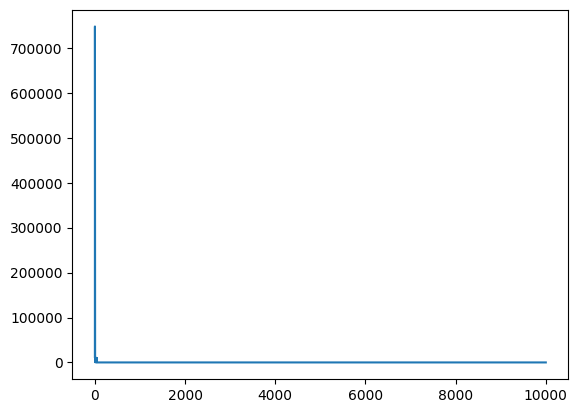

In [26]:
plt.plot(length_episode)

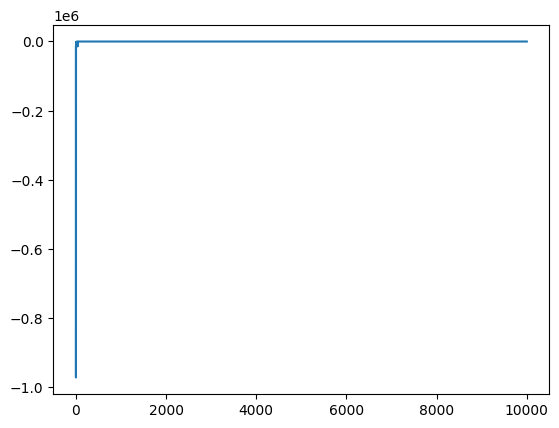

In [27]:
plt.plot(total_reward_episode)

In [31]:
def sarsa(env: gym.Env, gamma: float, n_episodes: int, alpha: float, epsilon: float) -> tuple[dict, dict]:
    n_actions = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_actions))
    for episode in range(n_episodes):
        # print(episode)
        state, _ = env.reset()
        is_done = False
        action = epsilon_greedy_policy(n_actions, Q, state, epsilon)
        while not is_done:
            new_state, reward, is_done, _, info = env.step(action)
            new_action = epsilon_greedy_policy(n_actions, Q, state, epsilon)
            td_delta = reward + gamma * Q[new_state][new_action] - Q[state][action]
            Q[state][action] = alpha * td_delta
            length_episode[episode] += 1
            total_reward_episode[episode] += reward

            state = new_state
            action = new_action
        print(episode)
    policy = {}
    for state, actions in Q.items():
        policy[state] = torch.argmax(actions).item()
    return Q, policy

In [32]:
n_episodes = 1000

In [ ]:
optimal_Q, optimal_policy = sarsa(env, gamma, n_episodes, alpha, epsilon)

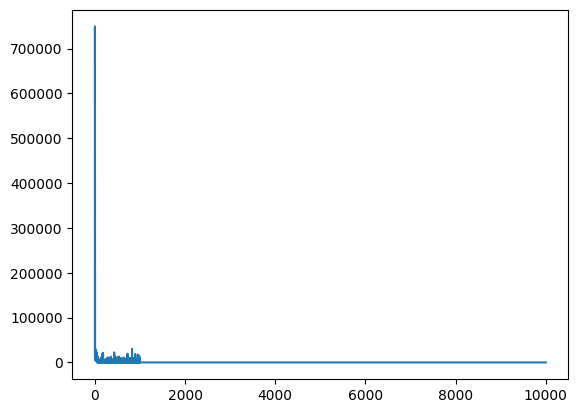

In [34]:
plt.plot(length_episode)

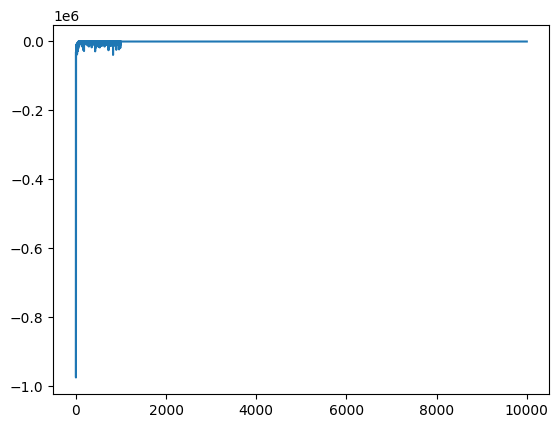

In [35]:
plt.plot(total_reward_episode)

In [36]:
env.close()

# Методы аппроксимации

## Mountain car

Раасмотрим среду с непрерывными состояниями. Цель сост. в том, чтобы привести автомобиль на вершину горы.

Действия:  
- Задний ход
- По инерции
- Передний ход

In [42]:
env = gym.make("MountainCar-v0", render_mode="rgb_array")

In [43]:
n_actions = env.action_space.n
n_actions

3

In [44]:
env.reset()

(array([-0.46340933,  0.        ], dtype=float32), {})

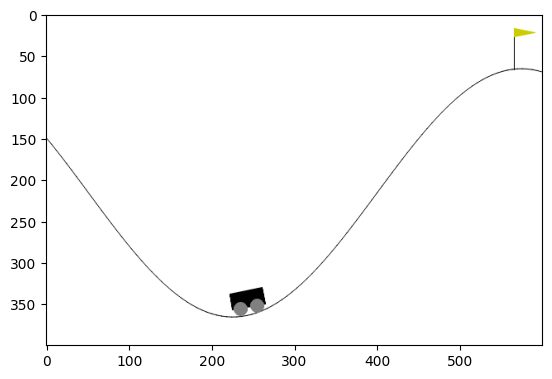

In [45]:
plt.imshow(env.render());

In [ ]:
is_done = False
i = 0
while not is_done and i < 10000:
    new_state, reward, is_done, _, info = env.step(2)
    i += 1

plt.imshow(env.render())

# Оценивание Q-функций посредством ...

Основная идея аппроксимации функции - восп. набором признаков для оценки значений Q-функции. Полезно, когда пространство состояний велико

В случайно линейной аппроксимации ф-ия ценности состояний зап. в виде взвешенной суммы признаков:
$$V(S)=\theta_1X_1(s)+\theta_2X_2(s)+...+\theta_nX_n(s),$$
где $X_1(s), X_2(s)...$ - набор признаков, зав. от состояний s, а $\theta_1, \theta_2...$ - веса этих признаков. В векторном виде:
$$V(s)=\theta X(s)$$

Вычисление в TD-методе:
$$V(s_t)=V(s_t)+\alpha[r+\gamma V(s_{t+1})-V(s_t)],$$

Обозн. временную разность:
$$\delta=r+\gamma V(s_{t+1})-V(s_i),$$
тогда $$V(S_t)=V(s_t)+\alpha\delta$$

Получили уравнение __градиентного спуска__.

Таким образом, цель обучения - найти оптимальные веса $\theta$ для аппроксимации функции состояний $V(s)$ для всех возможных действий.

После каждого эпизода мы имеем новую оценку ценности состояния веса $\theta$, приближаясь к оптимальным значениям.

Хорошим считается набор признаков, улавливающий динамику изменения состояния. Обычно набор признаков генерируется с помощью норм. распределений с 
Признак, соотв. состоянию s:
$$X(s)=\sqrt{\frac{2}{n_{feat}}}\cdot\cos(ws+b)$$

Косинус гарантирует, что признак попадает в $[-1, 1]$.

Матрица коэфф. w имеет размер $n_{feat} \times n_{state}$, а её элем. из норм. распределения с дисперсией $\sigma$, смещения b предст. списком $n_{feat}$ значений, выб. из норм. распр. на $[0, 2\pi]$

In [1]:
from torch.autograd import Variable
import math
from typing_extensions import Self

In [5]:
class LREstimator():
    def __init__(self, n_feat: int, n_state: int, n_action: int, lr: float = 0.05) -> None:
        self.w, self.b = self._gaussian_wb(n_feat, n_state)
        self.n_feat = n_feat
        self.models: list[Any] = []
        self.optimizers: list[Any] = []
        self.criterion = torch.nn.MSELoss()
        for _ in range(n_action):
            model = torch.nn.Linear(n_feat, 1)
            self.models.append(model)
            optimizer = torch.optim.SGD(model.parameters(), lr)
            self.optimizers.append(optimizer)
    
    def _gaussian_wb(self, n_feat: int, n_state: int, sigma: float = 0.2) -> tuple[torch.Tensor, torch.Tensor]:
        torch.manual_seed(0)
        w = torch.randn((n_state, n_feat)) / sigma
        b = torch.rand((n_feat)) * 2. * math.pi
        return w, b
    
    def get_features(self, s: int) -> torch.Tensor:
        features = (2. / self.n_feat) ** 0.5 * torch.cos(torch.matmul(torch.tensor(s).float(), self.w) + self.b)
        return features
    
    def update(self, state, a, y) -> Self:
        features = Variable(self.get_features(state))
        y_pred = self.models[a](features)

        loss = self.criterion(y_pred, Variable(torch.Tensor([y])))

        self.optimizers[a].zero_grad()
        loss.backward()

        self.optimizers[a].step()
        return self
    
    def predict(self, state) -> torch.Tensor:
        features = self.get_features(state)
        with torch.no_grad():
            return torch.tensor([model(features) for model in self.models])

In [53]:
estimator = LREstimator(10, 2, 1)
s1 = [0.5, 0.5]
print(estimator.get_features(s1))

tensor([-0.2266, -0.3957,  0.2000,  0.1358,  0.2827, -0.1091,  0.1892, -0.0599,
         0.3207,  0.1359])


In [54]:
s_list = [[1, 2], [2, 2], [3, 4], [2, 3], [2, 1]]
target_list = [1, 1.5, 2, 2, 1.5]

for s, target in zip(s_list, target_list):
    features = estimator.get_features(s)
    estimator.update(s, 0, target)

In [55]:
print(estimator.predict([0.5, 0.1]))
print(estimator.predict([2, 3]))

tensor([0.6172])
tensor([0.8733])


Метод аппроксимации ф-ии заменяет ценности состояний более компактной моделью, чем таблица точных значений в TD-методе.

Сначала пр-во состояний отображается в пр-во признаков, а затем значения Q-функции оцениваются с помощью модели регресии.

# Реализация Q-learning с линейной аппроксимацией функций

Q-обучение - это алгоритм в котором Q-функция обновляется по формуле:
$$Q(s,a)=Q(s,a)+\alpha(r+\gamma\underset{a'}{\max}Q(s',a')-Q(s,a))$$

s' - состояние, в которое окр. среда переходит из s росле действия a,  
r - полученное при этом вознаграждение,  
$\alpha$ - скорость обучение,  
$\gamma$ - коэфф. обесценивания

In [2]:
env = gym.make("MountainCar-v0", render_mode="rgb_array")

In [9]:
n_actions = env.action_space.n
n_actions

3

In [10]:
env.reset()

(array([-0.5138762,  0.       ], dtype=float32), {})

In [11]:
n_episodes = 10000
length_episode = [0] * n_episodes
total_reward_episode = [0] * n_episodes

In [12]:
gamma = 1
alpha = 0.4
epsilon = 0.1

In [7]:
from collections import defaultdict

def gen_epsilon_greedy_policy(estimator: LREstimator, epsilon: float, n_actions: int) -> Callable[[int], int]:
    def epsilon_greedy_policy(state: int) -> int:
        probabilities = torch.ones(n_actions) * epsilon / n_actions
        q_values = estimator.predict(state)
        best_action = torch.argmax(q_values).item()
        probabilities[best_action] += 1. - epsilon
        return torch.multinomial(probabilities, 1).item()
    return epsilon_greedy_policy

In [27]:
def q_learning(env: gym.Env, estimator: LREstimator, n_episodes: int, gamma: float = 1., epsilon: float = .1, epsilon_decay: float = .99) -> None:
    for episode in range(n_episodes):
        # print(episode)
        policy = gen_epsilon_greedy_policy(estimator, epsilon * epsilon_decay**episode, n_actions)
        state, _ = env.reset()
        is_done = False
        i = 0
        while not is_done and i < 300:
            action = policy(state)
            new_state, reward, is_done, _, info = env.step(action)
            q_values_next = estimator.predict(new_state)
            td_target = reward + gamma * torch.max(q_values_next)
            estimator.update(state, action, td_target)
            total_reward_episode[episode] += reward

            state = new_state
            i += 1
        if (episode % 100 == 0):
            print(episode)

In [32]:
n_states = env.observation_space.shape[0]
n_actions = env.action_space.n
n_features = 100
lr = 0.03
estimator = LREstimator(n_features, n_states, n_actions, lr)

In [33]:
n_episodes = 300
total_reward_episode = [0] * n_episodes
q_learning(env, estimator, n_episodes)

0
100
200


In [ ]:
total_reward_episode

# Реализация SARSA с линейной аппроксимацией функцией

В SARSA Q-функция обновляется по формуле:
$$Q(s,a)=Q(s,a)+\alpha(r+\gamma Q(s',a')-Q(s,a))$$
След. a' выб. из $\epsilon$-жадной стратегии. Член ошибки в SARSA c аппр. ф-ии:
$$\delta=r+\gamma V(s_{t+1})-V(s_t)=r+\gamma V(s',a')-V(s_t)$$
Цель обучения - мин. член ошибки, т.е.
$$V(s_t)=r+\gamma V(s',a')$$

In [35]:
def sarsa(env: gym.Env, estimator: LREstimator, n_episodes: int, gamma: float = 1., epsilon: float = .1, epsilon_decay: float = .99) -> None:
    for episode in range(n_episodes):
        # print(episode)
        policy = gen_epsilon_greedy_policy(estimator, epsilon * epsilon_decay**episode, env.action_space.n)
        state, _ = env.reset()
        is_done = False
        action = policy(state)
        while True:
            new_state, reward, is_done, _, info = env.step(action)
            q_values_next = estimator.predict(new_state)
            next_action = policy(new_state)
            td_target = reward + gamma * q_values_next[next_action]
            estimator.update(state, action, td_target)
            total_reward_episode[episode] += reward
            if is_done:
                break
            state = new_state
            action = next_action
        print(episode)

In [36]:
n_episodes = 10000
length_episode = [0] * n_episodes
total_reward_episode = [0] * n_episodes

In [37]:
gamma = 1
alpha = 0.4
epsilon = 0.1

In [38]:
n_states = env.observation_space.shape[0]
n_actions = env.action_space.n
n_features = 100
lr = 0.03
estimator = LREstimator(n_features, n_states, n_actions, lr)

In [ ]:
n_episodes = 300
total_reward_episode = [0] * n_episodes
sarsa(env, estimator, n_episodes)

In [ ]:
total_reward_episode

# Пакетная обработка с применением буфера воспроизведения опыта

Улучшим качество Q-обучения, включив буфер воспроизведения опыта. Воспроизведение опыта означает, что мы сохраняем опыт агента, накопленный на протяжении эпизода.

Этап обучения с воспроизведением опыта превращается в 2 этапа: накопление опыта и обновление моделей на основе полученного опыта по завершении эпизода. Опыт включает прошлое состояние, действие, вознаграждение и след. сост. для каждого шага.

На этапе обучения из буфера опыта случ. образом выбирается несколько примеров, которые исп. для обучения моделей. Воспроизведение опыта может стабилизировать процесс обучения, обеспечив набор слабо корр-ых примеров и повысив эфф. обучения.

In [41]:
from collections import deque
import random

In [42]:
n_states = env.observation_space.shape[0]
n_actions = env.action_space.n

In [43]:
memory = deque(maxlen=400)

In [48]:
def q_learning(env: gym.Env, estimator: LREstimator, n_episodes: int, replay_size: int, gamma: float = 1., epsilon: float = .1, epsilon_decay: float = .99) -> None:
    for episode in range(n_episodes):
        policy = gen_epsilon_greedy_policy(estimator, epsilon * epsilon_decay**episode, n_actions)
        state, _ = env.reset()
        is_done = False
        i = 0
        while not is_done and i < 1000:
            action = policy(state)
            new_state, reward, is_done, _, info = env.step(action)
            total_reward_episode[episode] += reward
            if is_done:
                break
            q_values_next = estimator.predict(new_state)
            td_target = reward + gamma * torch.max(q_values_next)
            memory.append((state, action, td_target))
            state = new_state
            i += 1
        replay_data = random.sample(memory, min(replay_size, len(memory)))
        for state, action, td_target in replay_data:
            estimator.update(state, action, td_target)
        if (episode % 100 == 0):
            print(episode)

In [45]:
n_episodes = 1000
replay_data = 100
total_reward_episode = [0] * n_episodes

In [49]:
n_states = env.observation_space.shape[0]
n_actions = env.action_space.n
n_features = 100
lr = 0.03
estimator = LREstimator(n_features, n_states, n_actions, lr)

In [ ]:
q_learning(env, estimator, n_episodes, 400)

In [53]:
env.close()

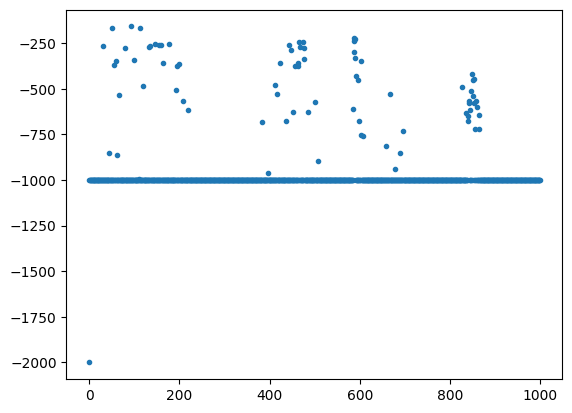

In [55]:
plt.plot(total_reward_episode, ls="", marker=".")

In [56]:
class NNEstimator():
    def __init__(self, n_feat: int, n_state: int, n_action: int, n_hidden = 50, lr: float = 0.05) -> None:
        self.w, self.b = self._gaussian_wb(n_feat, n_state)
        self.n_feat = n_feat
        self.models: list[Any] = []
        self.optimizers: list[Any] = []
        self.criterion = torch.nn.MSELoss()
        for _ in range(n_action):
            model = torch.nn.Sequential(
                torch.nn.Linear(n_feat, n_hidden),
                torch.nn.ReLU(),
                torch.nn.Linear(n_hidden, 1)
            )
            self.models.append(model)
            optimizer = torch.optim.Adam(model.parameters(), lr)
            self.optimizers.append(optimizer)
    
    def _gaussian_wb(self, n_feat: int, n_state: int, sigma: float = 0.2) -> tuple[torch.Tensor, torch.Tensor]:
        torch.manual_seed(0)
        w = torch.randn((n_state, n_feat)) / sigma
        b = torch.rand((n_feat)) * 2. * math.pi
        return w, b
    
    def get_features(self, s: int) -> torch.Tensor:
        features = (2. / self.n_feat) ** 0.5 * torch.cos(torch.matmul(torch.tensor(s).float(), self.w) + self.b)
        return features
    
    def update(self, state, a, y) -> Self:
        features = Variable(self.get_features(state))
        y_pred = self.models[a](features)

        loss = self.criterion(y_pred, Variable(torch.Tensor([y])))

        self.optimizers[a].zero_grad()
        loss.backward()

        self.optimizers[a].step()
        return self
    
    def predict(self, state) -> torch.Tensor:
        features = self.get_features(state)
        with torch.no_grad():
            return torch.tensor([model(features) for model in self.models])

In [11]:
env = gym.make("MountainCar-v0", render_mode="rgb_array")

In [58]:
n_states = env.observation_space.shape[0]
n_actions = env.action_space.n
n_features = 200
n_hidden = 50
lr = 0.001
estimator = NNEstimator(n_features, n_states, n_actions, n_hidden, lr)

In [59]:
memory = deque(maxlen=400)

In [60]:
def q_learning(env: gym.Env, estimator: NNEstimator, n_episodes: int, replay_size: int, gamma: float = 1., epsilon: float = .1, epsilon_decay: float = .99) -> None:
    for episode in range(n_episodes):
        policy = gen_epsilon_greedy_policy(estimator, epsilon * epsilon_decay**episode, n_actions)
        state, _ = env.reset()
        is_done = False
        i = 0
        while not is_done and i < 1000:
            action = policy(state)
            new_state, reward, is_done, _, info = env.step(action)
            total_reward_episode[episode] += reward
            if is_done:
                break
            q_values_next = estimator.predict(new_state)
            td_target = reward + gamma * torch.max(q_values_next)
            memory.append((state, action, td_target))
            state = new_state
            i += 1
        replay_data = random.sample(memory, min(replay_size, len(memory)))
        for state, action, td_target in replay_data:
            estimator.update(state, action, td_target)
        if (episode % 100 == 0):
            print(episode)

In [61]:
n_episodes = 1000
replay_data = 100
total_reward_episode = [0] * n_episodes

In [ ]:
q_learning(env, estimator, n_episodes, 400)

In [ ]:
plt.plot(total_reward_episode, ls="", marker=".")

# Глубокие Q-сети (DQN)

Глубокое Q-обучение в кот. исп. Q-сети, считается самой современной технологией обучения с подкреплением.

В глубоком Q-обучении нейронная сеть обуч. выводить значения $Q(s,a)$ для каждого действия, зная входное состояние s. Действие агента a выбирается на основе порождаемых значений $Q(s,a)$, следуя $\epsilon$-жадной стратегии.

In [18]:
class DQN():
    def __init__(self, n_state: int, n_action: int, n_hidden = 50, lr: float = 0.05) -> None:
        self.criterion = torch.nn.MSELoss()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(n_state, n_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(n_hidden, n_action)
        )
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
    
    def update(self, state, y) -> Self:
        y_pred = self.model(torch.Tensor(state))

        loss = self.criterion(y_pred, Variable(torch.Tensor(y)))

        self.optimizer.zero_grad()
        loss.backward()

        self.optimizer.step()
        return self
    
    def predict(self, state) -> torch.Tensor:
        with torch.no_grad():
            return self.model(torch.Tensor(state))

In [33]:
def q_learning(env: gym.Env, estimator: DQN, n_episodes: int, gamma: float = 1., epsilon: float = .1, epsilon_decay: float = .99) -> None:
    for episode in range(n_episodes):
        policy = gen_epsilon_greedy_policy(estimator, epsilon * epsilon_decay**episode, n_actions)
        state, _ = env.reset()
        is_done = False
        i = 0
        while not is_done and i < 500:
            action = policy(state)
            new_state, reward, is_done, _, info = env.step(action)
            total_reward_episode[episode] += reward
            modified_reward = new_state[0] + 0.5
            if new_state[0] >= 0.5:
                modified_reward += 100
            elif new_state[0] >= 0.25:
                modified_reward += 20
            elif new_state[0] >= 0.1:
                modified_reward += 10
            elif new_state[0] >= 0:
                modified_reward += 5

            q_values = estimator.predict(state).tolist()
            
            if is_done and i < 500:
                q_values[action] = modified_reward
                estimator.update(state, q_values)
                break
            q_values_next = estimator.predict(new_state)
            q_values[action] = modified_reward + gamma * torch.max(q_values_next).item()
            estimator.update(state, q_values)
            state = new_state

            i += 1
        epsilon = max(epsilon * epsilon_decay, 0.01)
        print(episode)

In [34]:
n_episodes = 100
total_reward_episode = [0] * n_episodes

In [35]:
n_states = env.observation_space.shape[0]
n_actions = env.action_space.n
n_hidden = 50
lr = 0.001
estimator = DQN(n_states, n_actions, n_hidden, lr)

In [ ]:
q_learning(env, estimator, n_episodes)

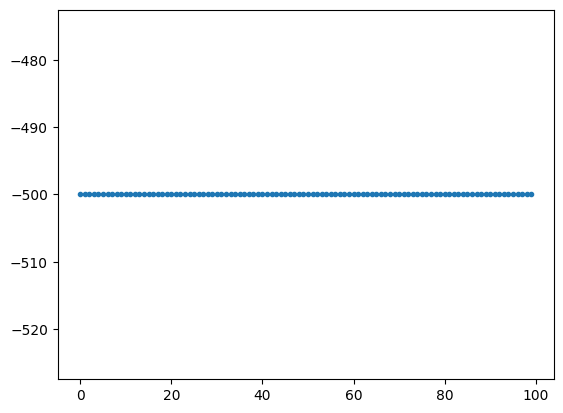

In [37]:
plt.plot(total_reward_episode, ls="", marker=".")

In [ ]:
class DQN():
    def __init__(self, n_state: int, n_action: int, n_hidden = 50, lr: float = 0.05) -> None:
        self.criterion = torch.nn.MSELoss()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(n_state, n_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(n_hidden, n_action)
        )
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
    
    def update(self, state, y) -> Self:
        y_pred = self.model(torch.Tensor(state))

        loss = self.criterion(y_pred, Variable(torch.Tensor(y)))

        self.optimizer.zero_grad()
        loss.backward()

        self.optimizer.step()
        return self
    
    def replay(self, memory: deque, replay_size: int, gamma: float) -> Self:
        if len(memory) >= replay_size:
            replay_data = random.sample(memory, replay_size)
            states = []
            td_targets = []
            for state, action, next_state, reward, is_done in replay_data:
                states.append(state)
                q_values = self.predict(state).tolist()
                if is_done:
                    q_values[action] = reward
                else:
                    q_values_next = self.predict(next_state)
                    q_values[action] = reward + gamma * torch.max(q_values_next).item()
                td_targets.append(q_values)
            self.update(states, td_targets)
    
    def predict(self, state) -> torch.Tensor:
        with torch.no_grad():
            return self.model(torch.Tensor(state))

In [ ]:
def q_learning(env: gym.Env, estimator: DQN, n_episodes: int, gamma: float = 1., epsilon: float = .1, epsilon_decay: float = .99) -> None:
    for episode in range(n_episodes):
        policy = gen_epsilon_greedy_policy(estimator, epsilon * epsilon_decay**episode, n_actions)
        state, _ = env.reset()
        is_done = False
        i = 0
        while not is_done and i < 500:
            action = policy(state)
            new_state, reward, is_done, _, info = env.step(action)
            total_reward_episode[episode] += reward
            modified_reward = new_state[0] + 0.5
            if new_state[0] >= 0.5:
                modified_reward += 100
            elif new_state[0] >= 0.25:
                modified_reward += 20
            elif new_state[0] >= 0.1:
                modified_reward += 10
            elif new_state[0] >= 0:
                modified_reward += 5

            q_values = estimator.predict(state).tolist()
            
            if is_done:
                q_values[action] = modified_reward
                estimator.update(state, q_values)
                break
            q_values_next = estimator.predict(new_state)
            q_values[action] = modified_reward + gamma * torch.max(q_values_next).item()
            estimator.update(state, q_values)
            state = new_state

            i += 1
        epsilon = max(epsilon * epsilon_decay, 0.01)
        print(episode)

В алгоритме двойной DQN для оценивания...

In [39]:
import copy
from collections import deque

class DoubleDQN():
    def __init__(self, n_state: int, n_action: int, n_hidden = 50, lr: float = 0.05) -> None:
        self.criterion = torch.nn.MSELoss()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(n_state, n_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(n_hidden, n_action)
        )
        self.model_target = copy.deepcopy(self.model)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr)
    
    def update(self, state, y) -> Self:
        y_pred = self.model(torch.Tensor(state))

        loss = self.criterion(y_pred, Variable(torch.Tensor(y)))

        self.optimizer.zero_grad()
        loss.backward()

        self.optimizer.step()
        return self
    
    def replay(self, memory: deque, replay_size: int, gamma: float) -> Self:
        if len(memory) >= replay_size:
            replay_data = random.sample(memory, replay_size)
            states = []
            td_targets = []
            for state, action, next_state, reward, is_done in replay_data:
                states.append(state)
                q_values = self.predict(state).tolist()
                if is_done:
                    q_values[action] = reward
                else:
                    q_values_next = self.target_predict(next_state).detach()
                    q_values[action] = reward + gamma * torch.max(q_values_next).item()
                td_targets.append(q_values)
            self.update(states, td_targets)
        return self
    
    def copy_target(self) -> None:
        self.model_target.load_state_dict(self.model.state_dict())
    
    def predict(self, state) -> torch.Tensor:
        with torch.no_grad():
            return self.model(torch.Tensor(state))
        
    def target_predict(self, state) -> torch.Tensor:
        with torch.no_grad():
            return self.model_target(torch.Tensor(state))

In [ ]:
def q_learning(env: gym.Env, estimator: DoubleDQN, n_episodes: int, replay_size: int, gamma: float = 1., epsilon: float = .1, epsilon_decay: float = .99) -> None:
    for episode in range(n_episodes):
        policy = gen_epsilon_greedy_policy(estimator, epsilon * epsilon_decay**episode, n_actions)
        state, _ = env.reset()
        is_done = False
        i = 0
        while not is_done and i < 500:
            action = policy(state)
            new_state, reward, is_done, _, info = env.step(action)
            total_reward_episode[episode] += reward
            modified_reward = new_state[0] + 0.5
            if new_state[0] >= 0.5:
                modified_reward += 100
            elif new_state[0] >= 0.25:
                modified_reward += 20
            elif new_state[0] >= 0.1:
                modified_reward += 10
            elif new_state[0] >= 0:
                modified_reward += 5

            memory.append((state, action, new_state, modified_reward, is_done))
            
            if is_done:
                break
            estimator.replay(memory, replay_size, gamma)
            state = new_state

            i += 1
        epsilon = max(epsilon * epsilon_decay, 0.01)
        print(episode)

In [40]:
env.close()

# Настройка гиперпараметров Double DQN

Для настройки гиперпараметров применим технику писка на сетке.

Будем исп. 3 генератора случайных чисел:
1) встроенный в gym
2) $\epsilon$-жадной стратегии
3) начальные веса сети в PyTorch

In [41]:
env = gym.make("MountainCar-v0")

In [42]:
n_states = env.observation_space.shape[0]
n_actions = env.action_space.n
n_episodes = 600
last_episode = 200

In [43]:
n_hidden_options = [30, 40]
lr_options = [0.001, 0.003]
replay_size_options = [20, 25]
target_update_options = [30, 35]

In [46]:
import random

for n_hidden in n_hidden_options:
    for lr in lr_options:
        for replay_size in replay_size_options:
            for target_update in target_update_options:
                env.reset(seed=1)
                random.seed(1)
                torch.manual_seed(1)

                dqn = DoubleDQN(n_states, n_actions, n_hidden, lr)
                memory = deque(maxlen=10000)
                total_reward_episode = [0] * n_episodes

                q_learning(env, dqn, n_episodes, replay_size, target_update, gamma=.9, epsilon=1)

                print(n_hidden, lr, replay_size, target_update, sum(total_reward_episode[-last_episode:]) / last_episode)

TypeError: q_learning() got multiple values for argument 'gamma'